In [225]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy as sci

complete_data_to_load = "CompleteDataset.csv"

In [2]:
# Loading csv file 
complete_soccer_df = pd.read_csv(complete_data_to_load)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Observing data frame
complete_soccer_df.head()

Unnamed: 0               Name  Age  \
0           0  Cristiano Ronaldo   32   
1           1           L. Messi   30   
2           2             Neymar   25   
3           3          L. Suárez   30   
4           4           M. Neuer   31   

                                             Photo Nationality  \
0   https://cdn.sofifa.org/48/18/players/20801.png    Portugal   
1  https://cdn.sofifa.org/48/18/players/158023.png   Argentina   
2  https://cdn.sofifa.org/48/18/players/190871.png      Brazil   
3  https://cdn.sofifa.org/48/18/players/176580.png     Uruguay   
4  https://cdn.sofifa.org/48/18/players/167495.png     Germany   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/38.png       94         94   
1  https://cdn.sofifa.org/flags/52.png       93         93   
2  https://cdn.sofifa.org/flags/54.png       92         94   
3  https://cdn.sofifa.org/flags/60.png       92         92   
4  https://cdn.sofifa.org/flags/21.png       92         92   

                  Club                                   Club Logo  ...   \
0       Real Madrid CF  https://cdn.sofifa.org/24/18/teams/243.png  ...    
1         FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png  ...    
2  Paris Saint-Germain   https://cdn.sofifa.org/24/18/teams/73.png  ...    
3         FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png  ...    
4     FC Bayern Munich   https://cdn.sofifa.org/24/18/teams/21.png  ...    

     RB   RCB   RCM   RDM    RF    RM    RS    RW   RWB    ST  
0  61.0  53.0  82.0  62.0  91.0  89.0  92.0  91.0  66.0  92.0  
1  57.0  45.0  84.0  59.0  92.0  90.0  88.0  91.0  62.0  88.0  
2  59.0  46.0  79.0  59.0  88.0  87.0  84.0  89.0  64.0  84.0  
3  64.0  58.0  80.0  65.0  88.0  85.0  88.0  87.0  68.0  88.0  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 75 columns]

In [4]:
# Observing the columns within the dataframe 
complete_soccer_df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [5]:
# Observing the data types within my dataframe 
complete_soccer_df.dtypes

Unnamed: 0               int64
Name                    object
Age                      int64
Photo                   object
Nationality             object
Flag                    object
Overall                  int64
Potential                int64
Club                    object
Club Logo               object
Value                   object
Wage                    object
Special                  int64
Acceleration            object
Aggression              object
Agility                 object
Balance                 object
Ball control            object
Composure               object
Crossing                object
Curve                   object
Dribbling               object
Finishing               object
Free kick accuracy      object
GK diving               object
GK handling             object
GK kicking              object
GK positioning          object
GK reflexes             object
Heading accuracy        object
                        ...   
Vision                  object
Volleys 

In [6]:
# Describing data, it seems that we are missing values 
complete_soccer_df.describe

<bound method NDFrame.describe of        Unnamed: 0               Name  Age  \
0               0  Cristiano Ronaldo   32   
1               1           L. Messi   30   
2               2             Neymar   25   
3               3          L. Suárez   30   
4               4           M. Neuer   31   
5               5     R. Lewandowski   28   
6               6             De Gea   26   
7               7          E. Hazard   26   
8               8           T. Kroos   27   
9               9         G. Higuaín   29   
10             10       Sergio Ramos   31   
11             11       K. De Bruyne   26   
12             12        T. Courtois   25   
13             13         A. Sánchez   28   
14             14          L. Modrić   31   
15             15            G. Bale   27   
16             16          S. Agüero   29   
17             17       G. Chiellini   32   
18             18          G. Buffon   39   
19             19          P. Dybala   23   
20             20    

In [7]:
# Counting the number of values withing each column - I am missing values 
complete_soccer_df.count()
# Cleaning data so we have consitent values, I noticed that this dropped all goalkeepers from my dataset*
clean_soccer_df = complete_soccer_df.dropna(how="any")
# Checking my work
clean_soccer_df.count() 
# Creating a data frame with the columns I want to include 
organzied_soccer_df = clean_soccer_df[["Unnamed: 0", "Name", "Age", "Overall", "Potential", "Club", "Value", "Wage", "Acceleration", "Aggression", "Ball control", "Dribbling", "Finishing", "Shot power", "Strength", "Sprint speed", "Stamina", "Preferred Positions"]]
# Checking my work 
organzied_soccer_df.count()

Unnamed: 0             15746
Name                   15746
Age                    15746
Overall                15746
Potential              15746
Club                   15746
Value                  15746
Wage                   15746
Acceleration           15746
Aggression             15746
Ball control           15746
Dribbling              15746
Finishing              15746
Shot power             15746
Strength               15746
Sprint speed           15746
Stamina                15746
Preferred Positions    15746
dtype: int64

In [8]:
# I would like to use value and wages in calculations, I need to seperate the data frames based on value and wage to reformat
organzied_soccer_df.loc[organzied_soccer_df['Value'].str.contains('K'), 'Thou/Mill'] = 'Thou'
organzied_soccer_df.loc[organzied_soccer_df['Value'].str.contains('M'), 'Thou/Mill'] = 'Mill'

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [9]:
# Here I am seperating the dataframes based on a value within the column 
thousand_value_df = organzied_soccer_df[organzied_soccer_df["Thou/Mill"] != 'Mill']
million_value_df = organzied_soccer_df[organzied_soccer_df["Thou/Mill"] == 'Mill']

In [10]:
# In the next three inputs I am checking my work to ensure I didnt lose any data 
organzied_soccer_df.shape 

(15746, 19)

In [11]:
thousand_value_df.shape

(9394, 19)

In [12]:
million_value_df.shape

(6352, 19)

In [13]:
# Now I need to reformat the wage and value columns starting with the group that is valued over a million
million_value_df.head()

Unnamed: 0               Name  Age  Overall  Potential  \
0           0  Cristiano Ronaldo   32       94         94   
1           1           L. Messi   30       93         93   
2           2             Neymar   25       92         94   
3           3          L. Suárez   30       92         92   
5           5     R. Lewandowski   28       91         91   

                  Club   Value   Wage Acceleration Aggression Ball control  \
0       Real Madrid CF  €95.5M  €565K           89         63           93   
1         FC Barcelona   €105M  €565K           92         48           95   
2  Paris Saint-Germain   €123M  €280K           94         56           95   
3         FC Barcelona    €97M  €510K           88         78           91   
5     FC Bayern Munich    €92M  €355K           79         80           89   

  Dribbling Finishing Shot power Strength Sprint speed Stamina  \
0        91        94         94       80           91      92   
1        97        95         85       59           87      73   
2        96        89         80       53           90      78   
3        86        94         87       80           77      89   
5        85        91         88       84           83      79   

  Preferred Positions Thou/Mill  
0              ST LW       Mill  
1                 RW       Mill  
2                 LW       Mill  
3                 ST       Mill  
5                 ST       Mill

In [14]:
# Extracting the values within the value and wage columns  
million_value_df["Value Int"] = million_value_df["Value"].str.extract('(\d+)')
million_value_df["Wage Int"] = million_value_df["Wage"].str.extract('(\d+)')
# Converting the columns to float data types 
million_value_df["Value Int"] = pd.to_numeric(million_value_df["Value Int"], downcast='float')
million_value_df["Wage Int"] = pd.to_numeric(million_value_df["Wage Int"], downcast='float')
# Checking my work 
million_value_df.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

Unnamed: 0               Name  Age  Overall  Potential  \
0           0  Cristiano Ronaldo   32       94         94   
1           1           L. Messi   30       93         93   
2           2             Neymar   25       92         94   
3           3          L. Suárez   30       92         92   
5           5     R. Lewandowski   28       91         91   

                  Club   Value   Wage Acceleration Aggression    ...     \
0       Real Madrid CF  €95.5M  €565K           89         63    ...      
1         FC Barcelona   €105M  €565K           92         48    ...      
2  Paris Saint-Germain   €123M  €280K           94         56    ...      
3         FC Barcelona    €97M  €510K           88         78    ...      
5     FC Bayern Munich    €92M  €355K           79         80    ...      

  Dribbling Finishing Shot power Strength Sprint speed Stamina  \
0        91        94         94       80           91      92   
1        97        95         85       59           87      73   
2        96        89         80       53           90      78   
3        86        94         87       80           77      89   
5        85        91         88       84           83      79   

  Preferred Positions Thou/Mill Value Int  Wage Int  
0              ST LW       Mill      95.0     565.0  
1                 RW       Mill     105.0     565.0  
2                 LW       Mill     123.0     280.0  
3                 ST       Mill      97.0     510.0  
5                 ST       Mill      92.0     355.0  

[5 rows x 21 columns]

In [15]:
# Converting the wage column to proper format
million_value_df["Wage Int"] = million_value_df["Wage Int"] * 1000
# Attempting to spot any outliers
million_value_df["Wage Int"].unique()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([565000., 280000., 510000., 355000., 295000., 340000., 275000.,
       310000., 285000., 265000., 370000., 325000., 225000., 215000.,
       150000., 165000., 210000., 125000., 175000., 240000., 190000.,
       130000., 195000., 160000., 250000., 220000., 260000., 205000.,
       120000., 235000., 135000., 110000., 115000.,  94000.,  77000.,
       180000.,  60000., 145000.,  81000., 170000., 105000.,  36000.,
        96000.,  84000., 200000.,  59000.,  68000.,  38000.,  31000.,
        53000.,  37000.,  70000.,  78000.,  58000.,  75000.,  21000.,
        88000.,  89000.,  18000.,  56000.,  39000., 140000., 100000.,
        45000.,  28000.,  25000.,  66000.,  87000.,  15000.,  50000.,
        27000.,  73000.,  40000.,  80000.,  46000.,  62000., 155000.,
        47000.,  67000.,  98000.,  76000., 185000.,  20000.,  43000.,
        85000.,  92000.,  95000.,  19000.,  42000.,  64000.,  99000.,
         1000.,  51000.,  54000.,  35000.,  48000.,  72000.,  29000.,
        12000.,  260

In [16]:
# Converting the value column to proper format
million_value_df["Value Int"] = million_value_df["Value Int"] * 1000000
# Attempting to spot any outliers
million_value_df["Value Int"].unique()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([9.50e+07, 1.05e+08, 1.23e+08, 9.70e+07, 9.20e+07, 9.00e+07,
       7.90e+07, 7.70e+07, 5.20e+07, 8.30e+07, 6.70e+07, 5.70e+07,
       6.90e+07, 6.60e+07, 3.80e+07, 7.50e+07, 7.00e+07, 6.10e+07,
       4.40e+07, 4.80e+07, 4.00e+07, 6.00e+07, 3.40e+07, 2.70e+07,
       3.60e+07, 6.40e+07, 6.50e+07, 3.70e+07, 2.90e+07, 5.90e+07,
       5.60e+07, 4.70e+07, 4.50e+07, 3.30e+07, 4.60e+07, 4.20e+07,
       4.30e+07, 2.50e+07, 4.10e+07, 2.20e+07, 1.30e+07, 5.10e+07,
       3.90e+07, 3.00e+07, 2.80e+07, 2.60e+07, 5.00e+06, 3.50e+07,
       3.20e+07, 3.10e+07, 1.80e+07, 2.30e+07, 2.10e+07, 9.00e+06,
       1.10e+07, 2.40e+07, 2.00e+07, 1.60e+07, 1.40e+07, 1.90e+07,
       1.70e+07, 1.00e+07, 1.50e+07, 1.20e+07, 6.00e+06, 8.00e+06,
       7.00e+06, 3.00e+06, 4.00e+06, 1.00e+06, 2.00e+06])

In [17]:
# Checking my data frame to see if my conversions were accurate 
million_value_df.head(20)

Unnamed: 0               Name  Age  Overall  Potential  \
0            0  Cristiano Ronaldo   32       94         94   
1            1           L. Messi   30       93         93   
2            2             Neymar   25       92         94   
3            3          L. Suárez   30       92         92   
5            5     R. Lewandowski   28       91         91   
7            7          E. Hazard   26       90         91   
8            8           T. Kroos   27       90         90   
9            9         G. Higuaín   29       90         90   
10          10       Sergio Ramos   31       90         90   
11          11       K. De Bruyne   26       89         92   
13          13         A. Sánchez   28       89         89   
14          14          L. Modrić   31       89         89   
15          15            G. Bale   27       89         89   
16          16          S. Agüero   29       89         89   
17          17       G. Chiellini   32       89         89   
19          19          P. Dybala   23       88         93   
21          21       A. Griezmann   26       88         91   
22          22             Thiago   26       88         90   
23          23      P. Aubameyang   28       88         88   
24          24         L. Bonucci   30       88         88   

                   Club   Value   Wage Acceleration Aggression    ...     \
0        Real Madrid CF  €95.5M  €565K           89         63    ...      
1          FC Barcelona   €105M  €565K           92         48    ...      
2   Paris Saint-Germain   €123M  €280K           94         56    ...      
3          FC Barcelona    €97M  €510K           88         78    ...      
5      FC Bayern Munich    €92M  €355K           79         80    ...      
7               Chelsea  €90.5M  €295K           93         54    ...      
8        Real Madrid CF    €79M  €340K           60         60    ...      
9              Juventus    €77M  €275K           78         50    ...      
10       Real Madrid CF    €52M  €310K           75         84    ...      
11      Manchester City    €83M  €285K           76         68    ...      
13              Arsenal  €67.5M  €265K           88         80    ...      
14       Real Madrid CF    €57M  €340K           75         62    ...      
15       Real Madrid CF  €69.5M  €370K           93         65    ...      
16      Manchester City  €66.5M  €325K           90         63    ...      
17             Juventus    €38M  €225K           68         92    ...      
19             Juventus    €79M  €215K           88         48    ...      
21      Atlético Madrid    €75M  €150K           87         69    ...      
22     FC Bayern Munich  €70.5M  €225K           77         57    ...      
23    Borussia Dortmund    €61M  €165K           95         43    ...      
24                Milan    €44M  €210K           62         82    ...      

   Dribbling Finishing Shot power Strength Sprint speed Stamina  \
0         91        94         94       80           91      92   
1         97        95         85       59           87      73   
2         96        89         80       53           90      78   
3         86        94         87       80           77      89   
5         85        91         88       84           83      79   
7         93        83         79       65           87      79   
8         79        76         87       74           52      77   
9         84        91         88       85           80      72   
10        61        60         79       81           77      84   
11        85        83         85       73           75      87   
13        90        85         84       72           84      85   
14        86        71         73       58           71      82   
15        89        87         91       80           95      76   
16        89        90         88       74           84      74   
17        58        33         78       91           78      68   
19        92        85         8

In [18]:
# Checking to see if my data types are now correct 
million_value_df.dtypes

Unnamed: 0               int64
Name                    object
Age                      int64
Overall                  int64
Potential                int64
Club                    object
Value                   object
Wage                    object
Acceleration            object
Aggression              object
Ball control            object
Dribbling               object
Finishing               object
Shot power              object
Strength                object
Sprint speed            object
Stamina                 object
Preferred Positions     object
Thou/Mill               object
Value Int              float64
Wage Int               float32
dtype: object

In [19]:
# Extracting the values within the value and wage columns 
thousand_value_df["Value Int"] = thousand_value_df["Value"].str.extract('(\d+)')
thousand_value_df["Wage Int"] = thousand_value_df["Wage"].str.extract('(\d+)')
# Converting the columns to float data types 
thousand_value_df["Value Int"] = pd.to_numeric(thousand_value_df["Value Int"], downcast='float')
thousand_value_df["Wage Int"] = pd.to_numeric(thousand_value_df["Wage Int"], downcast='float')
# Checking my work 
thousand_value_df.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

Unnamed: 0          Name  Age  Overall  Potential  \
853          853        Hilton   39       78         78   
1738        1738   T. Kalachev   36       75         75   
1850        1850    E. Moretti   36       75         75   
1861        1861  P. Cannavaro   36       75         75   
1941        1941    Trashorras   36       75         75   

                        Club  Value  Wage Acceleration Aggression    ...     \
853   Montpellier Hérault SC  €700K  €18K           34         76    ...      
1738               FC Rostov  €775K  €21K           74         76    ...      
1850                  Torino  €900K  €26K           48         74    ...      
1861                Sassuolo  €900K  €30K           34         80    ...      
1941          Rayo Vallecano  €900K   €8K           40         71    ...      

     Dribbling Finishing Shot power Strength Sprint speed Stamina  \
853         65        45         55       76           42      54   
1738        75        71         70       56           69      68   
1850        49        16         56       73           38      50   
1861        45        30         72       75           31      36   
1941        62        59         71       70           32      75   

     Preferred Positions Thou/Mill Value Int  Wage Int  
853                  CB       Thou     700.0      18.0  
1738          CF RM RWB       Thou     775.0      21.0  
1850                 CB       Thou     900.0      26.0  
1861                 CB       Thou     900.0      30.0  
1941         CAM CM CDM       Thou     900.0       8.0  

[5 rows x 21 columns]

In [20]:
# Ensuring I didnt lose any data
thousand_value_df.shape

(9394, 21)

In [21]:
# Checking for any outliers 
thousand_value_df["Value Int"].unique()

array([700., 775., 900.,   0., 750., 650., 875., 950., 550., 450., 725.,
       425., 975., 325., 160., 270., 850., 800., 500., 675., 600., 240.,
       575., 925., 375., 625., 250., 825., 350., 230., 400., 120., 525.,
       140., 300., 475., 280., 190., 100., 290., 180.,  50., 260., 220.,
        90., 150., 200.,  40., 130.,  70., 210.,  60., 170., 110.,  80.,
        30.,  20.,  10.])

In [22]:
# Here I am converting to proper numerical format, I initially messed up so here I am correcting my work 
thousand_value_df["Value Int"] = thousand_value_df["Value Int"] * 1000
thousand_value_df["Wage Int"] = thousand_value_df["Wage Int"] * 1000
thousand_value_df["Value Int"].unique()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([700000., 775000., 900000.,      0., 750000., 650000., 875000.,
       950000., 550000., 450000., 725000., 425000., 975000., 325000.,
       160000., 270000., 850000., 800000., 500000., 675000., 600000.,
       240000., 575000., 925000., 375000., 625000., 250000., 825000.,
       350000., 230000., 400000., 120000., 525000., 140000., 300000.,
       475000., 280000., 190000., 100000., 290000., 180000.,  50000.,
       260000., 220000.,  90000., 150000., 200000.,  40000., 130000.,
        70000., 210000.,  60000., 170000., 110000.,  80000.,  30000.,
        20000.,  10000.])

In [23]:
# Based on my unique and sort_values command I am misisng values, I am going to drop all these rows 
thousand_value_df.sort_values("Value Int", ascending=True)

Unnamed: 0               Name  Age  Overall  Potential  \
3309         3309         M. Candelo   40       72         72   
3148         3148          T. Simons   40       73         73   
13863       13863           M. Brown   40       61         61   
2224         2224           B. Nivet   40       74         74   
7727         7727          K. Wæhler   41       67         67   
17577       17577           R. Kawai   38       52         52   
17923       17923          H. Tanaka   34       49         49   
16749       16749         D. Mulcahy   39       55         55   
15262       15262          A. Faivre   39       59         59   
17536       17536           I. Homma   36       52         52   
15935       15935         M. Edwards   37       58         58   
15094       15094           T. Tsuda   36       59         59   
15084       15084        H. Yamamoto   37       59         59   
17150       17150         J. McCombe   34       54         54   
17178       17178          J. Robben   34       54         54   
17946       17946        Y. Uchimura   32       48         48   
17917       17917          S. Uehara   30       49         49   
14109       14109        T. Masukawa   37       61         61   
16934       16934          T. Torske   33       55         55   
14218       14218       Hwang Ji Soo   36       61         61   
17918       17918             H. Mae   21       49         53   
17947       17947          E. Hughes   18       48         56   
16867       16867        N. Ishikawa   36       55         55   
13816       13816          M. Nelson   37       61         61   
17677       17677          K. Schulz   27       51         51   
17117       17117          B. Molloy   33       54         54   
17788       17788        A. Kawazura   23       50         56   
17824       17824      O. Al Suhaymi   24       50         55   
17864       17864          F. Jazvić   26       50         50   
17975       17975       T. Käßemodel   28       46         46   
...           ...                ...  ...      ...        ...   
9044         9044        M. Niakhaté   21       66         77   
7467         7467           A. Ajeti   23       68         72   
11293       11293      Lee Sang Heon   19       64         79   
7475         7475      A. Martinelli   24       68         72   
5133         5133           L. Arias   32       70         70   
7476         7476         P. Polomat   23       68         72   
7814         7814       P. Kirkevold   26       67         70   
9245         9245      B. Chardonnet   22       66         77   
8354         8354           D. Poyet   22       67         75   
11727       11727           G. Togni   19       64         81   
9574         9574         D. Crowley   19       66         75   
8246         8246         T. Redding   20       67         75   
8507         8507            Joaquín   21       67         75   
7189         7189        P. Testroet   26       68         68   
8554         8554       M. Cacutalua   22       67         75   
8335         8335            P. Eler   26       67         70   
9371         9371          F. Beijmo   19       66         78   
9802         9802          U. Zeybek   22       66         75   
7825         7825         M. Guanini   21       67         75   
5721         5721      M. Piedrahita   32       70         70   
9648         9648           Rafa Mir   19       66         75   
7165         7165            R. Ince   24       68         72   
6548         6548         J. Bennett   27       69         70   
11142       11142           C. Ronan   19       64         79   
7649         7649           H. Marín   24       68         72   
9801         9801  J. Forster-Caskey   23       66         75   
7447         7447              Derik   24       68         72   
9247         9247         S. Raggett   23       66         77   
10367       10367           M. Rojas   21       65         77   
8643         8643          R. Mirzov   24 

In [24]:
# Dropping nan values 
cleaned_thousand_df = thousand_value_df.dropna(how="any")
# Checking my work 
cleaned_thousand_df.sort_values("Value Int", ascending=True)

Unnamed: 0               Name  Age  Overall  Potential  \
17536       17536           I. Homma   36       52         52   
17577       17577           R. Kawai   38       52         52   
17923       17923          H. Tanaka   34       49         49   
15262       15262          A. Faivre   39       59         59   
16749       16749         D. Mulcahy   39       55         55   
15094       15094           T. Tsuda   36       59         59   
17946       17946        Y. Uchimura   32       48         48   
15084       15084        H. Yamamoto   37       59         59   
17917       17917          S. Uehara   30       49         49   
17178       17178          J. Robben   34       54         54   
15935       15935         M. Edwards   37       58         58   
17150       17150         J. McCombe   34       54         54   
17117       17117          B. Molloy   33       54         54   
16934       16934          T. Torske   33       55         55   
17947       17947          E. Hughes   18       48         56   
16867       16867        N. Ishikawa   36       55         55   
17918       17918             H. Mae   21       49         53   
17788       17788        A. Kawazura   23       50         56   
17677       17677          K. Schulz   27       51         51   
14109       14109        T. Masukawa   37       61         61   
17864       17864          F. Jazvić   26       50         50   
17975       17975       T. Käßemodel   28       46         46   
14218       14218       Hwang Ji Soo   36       61         61   
17824       17824      O. Al Suhaymi   24       50         55   
16721       16721        K. Ishihara   38       55         55   
13816       13816          M. Nelson   37       61         61   
16605       16605            D. Pipe   33       56         56   
17714       17714          T. Hunter   23       51         58   
17782       17782       Z. Al Haniti   20       50         60   
17579       17579           K. Ishii   31       52         52   
...           ...                ...  ...      ...        ...   
8133         8133      A. Zabolotnyy   26       67         70   
7189         7189        P. Testroet   26       68         68   
11032       11032       B. Stevenson   20       64         79   
7165         7165            R. Ince   24       68         72   
11668       11668          D. Kutesa   19       64         81   
9900         9900           I. Toney   21       65         77   
11050       11050        B. Tekpetey   19       64         80   
11053       11053          D. Brooks   19       64         81   
8700         8700        S. Štefánik   25       67         71   
8181         8181           O. Bulut   23       67         70   
10242       10242       T. Rodríguez   21       65         77   
7135         7135          Elgezabal   24       68         72   
10228       10228  A. Hadžiahmetović   20       65         77   
8689         8689         Sergio Gil   21       67         75   
4946         4946        S. Sarıoğlu   32       70         70   
11092       11092        Edu Cortina   20       64         79   
8209         8209         Pol García   22       67         75   
11097       11097        Asier Gomes   19       64         79   
9166         9166            T. Chow   23       66         75   
7104         7104       E. Castañeda   24       68         72   
8226         8226          W. Zahibo   23       67         75   
9648         9648           Rafa Mir   19       66         75   
11139       11139          S. Mallan   21       64         78   
5133         5133           L. Arias   32       70         70   
11142       11142           C. Ronan   19       64         79   
8246         8246         T. Redding   20       67         75   
7058         7058          L. Bijker   24       68         72   
8274         8274         Mama Baldé   21       67         75   
11229       11229        I. Akhmetov   19       64         81   
8335         8335            P. Eler   26 

In [25]:
# Now I will combine the dataframes into a single data frame. 
concated_df = pd.concat([cleaned_thousand_df, million_value_df])
# Taking a look at the final df
concated_df.head()

Unnamed: 0          Name  Age  Overall  Potential  \
853          853        Hilton   39       78         78   
1738        1738   T. Kalachev   36       75         75   
1850        1850    E. Moretti   36       75         75   
1861        1861  P. Cannavaro   36       75         75   
1941        1941    Trashorras   36       75         75   

                        Club  Value  Wage Acceleration Aggression    ...     \
853   Montpellier Hérault SC  €700K  €18K           34         76    ...      
1738               FC Rostov  €775K  €21K           74         76    ...      
1850                  Torino  €900K  €26K           48         74    ...      
1861                Sassuolo  €900K  €30K           34         80    ...      
1941          Rayo Vallecano  €900K   €8K           40         71    ...      

     Dribbling Finishing Shot power Strength Sprint speed Stamina  \
853         65        45         55       76           42      54   
1738        75        71         70       56           69      68   
1850        49        16         56       73           38      50   
1861        45        30         72       75           31      36   
1941        62        59         71       70           32      75   

     Preferred Positions Thou/Mill Value Int  Wage Int  
853                  CB       Thou  700000.0   18000.0  
1738          CF RM RWB       Thou  775000.0   21000.0  
1850                 CB       Thou  900000.0   26000.0  
1861                 CB       Thou  900000.0   30000.0  
1941         CAM CM CDM       Thou  900000.0    8000.0  

[5 rows x 21 columns]

In [26]:
# Checking to make sure I didnt lose more than 5 rows (number I dropped that were nan)
concated_df.shape

(15741, 21)

In [27]:
# Sorting my "Overall" column to make the df readable (preferance) also renaming 
final_df = concated_df.sort_values("Overall", ascending=False)
# Looking at the final df 
final_df.head()

Unnamed: 0               Name  Age  Overall  Potential  \
0           0  Cristiano Ronaldo   32       94         94   
1           1           L. Messi   30       93         93   
3           3          L. Suárez   30       92         92   
2           2             Neymar   25       92         94   
5           5     R. Lewandowski   28       91         91   

                  Club   Value   Wage Acceleration Aggression    ...     \
0       Real Madrid CF  €95.5M  €565K           89         63    ...      
1         FC Barcelona   €105M  €565K           92         48    ...      
3         FC Barcelona    €97M  €510K           88         78    ...      
2  Paris Saint-Germain   €123M  €280K           94         56    ...      
5     FC Bayern Munich    €92M  €355K           79         80    ...      

  Dribbling Finishing Shot power Strength Sprint speed Stamina  \
0        91        94         94       80           91      92   
1        97        95         85       59           87      73   
3        86        94         87       80           77      89   
2        96        89         80       53           90      78   
5        85        91         88       84           83      79   

  Preferred Positions Thou/Mill    Value Int  Wage Int  
0              ST LW       Mill   95000000.0  565000.0  
1                 RW       Mill  105000000.0  565000.0  
3                 ST       Mill   97000000.0  510000.0  
2                 LW       Mill  123000000.0  280000.0  
5                 ST       Mill   92000000.0  355000.0  

[5 rows x 21 columns]

In [28]:
# Ensuring all my data is still consistent 
final_df.shape

(15741, 21)

In [29]:
# Checking work
final_df["Wage Int"].unique()

array([565000., 510000., 280000., 355000., 295000., 275000., 340000.,
       310000., 225000., 285000., 370000., 265000., 325000., 215000.,
       150000., 165000., 240000., 125000., 210000., 175000., 190000.,
       130000., 195000., 160000., 220000., 260000., 250000., 120000.,
       205000.,  94000., 135000., 115000., 110000., 235000.,  77000.,
       105000., 170000.,  81000., 145000.,  60000., 180000., 200000.,
        38000.,  68000.,  59000.,  36000.,  84000.,  96000.,  31000.,
        50000.,  28000.,  25000.,  66000.,  87000.,  15000.,  70000.,
        27000.,  75000.,  21000.,  73000.,  40000.,  80000.,  46000.,
        62000.,  45000., 100000.,  53000.,  37000.,  78000.,  58000.,
        88000.,  89000.,  18000.,  56000., 155000.,  39000., 140000.,
        47000.,  67000.,  54000.,  51000.,   1000.,  99000.,  85000.,
        12000.,  48000.,  29000.,  72000.,  64000.,  35000.,  43000.,
        20000.,  76000.,  98000., 185000.,  42000.,  19000.,  95000.,
        92000.,  130

In [30]:
# Checking work 
final_df["Value Int"].unique()

array([9.50e+07, 1.05e+08, 9.70e+07, 1.23e+08, 9.20e+07, 9.00e+07,
       7.70e+07, 7.90e+07, 5.20e+07, 3.80e+07, 8.30e+07, 6.90e+07,
       5.70e+07, 6.70e+07, 6.60e+07, 7.50e+07, 7.00e+07, 6.10e+07,
       2.70e+07, 4.80e+07, 4.00e+07, 4.40e+07, 3.40e+07, 3.60e+07,
       6.00e+07, 6.40e+07, 6.50e+07, 3.70e+07, 2.90e+07, 4.20e+07,
       5.90e+07, 3.30e+07, 4.50e+07, 5.60e+07, 4.70e+07, 1.30e+07,
       4.30e+07, 2.20e+07, 4.10e+07, 2.50e+07, 4.60e+07, 5.10e+07,
       5.00e+06, 2.60e+07, 2.80e+07, 3.90e+07, 3.00e+07, 3.10e+07,
       2.30e+07, 1.10e+07, 2.10e+07, 9.00e+06, 1.80e+07, 3.50e+07,
       3.20e+07, 2.00e+07, 2.40e+07, 1.60e+07, 1.40e+07, 1.90e+07,
       1.70e+07, 1.00e+07, 1.50e+07, 1.20e+07, 8.00e+06, 6.00e+06,
       7.00e+06, 3.00e+06, 1.00e+06, 4.00e+06, 2.00e+06, 7.00e+05,
       7.75e+05, 9.00e+05, 7.50e+05, 6.50e+05, 5.50e+05, 4.50e+05,
       9.50e+05, 8.75e+05, 7.25e+05, 4.25e+05, 9.75e+05, 8.00e+05,
       3.25e+05, 8.50e+05, 1.60e+05, 2.70e+05, 5.00e+05, 6.75e

In [31]:
final_df.head()

Unnamed: 0               Name  Age  Overall  Potential  \
0           0  Cristiano Ronaldo   32       94         94   
1           1           L. Messi   30       93         93   
3           3          L. Suárez   30       92         92   
2           2             Neymar   25       92         94   
5           5     R. Lewandowski   28       91         91   

                  Club   Value   Wage Acceleration Aggression    ...     \
0       Real Madrid CF  €95.5M  €565K           89         63    ...      
1         FC Barcelona   €105M  €565K           92         48    ...      
3         FC Barcelona    €97M  €510K           88         78    ...      
2  Paris Saint-Germain   €123M  €280K           94         56    ...      
5     FC Bayern Munich    €92M  €355K           79         80    ...      

  Dribbling Finishing Shot power Strength Sprint speed Stamina  \
0        91        94         94       80           91      92   
1        97        95         85       59           87      73   
3        86        94         87       80           77      89   
2        96        89         80       53           90      78   
5        85        91         88       84           83      79   

  Preferred Positions Thou/Mill    Value Int  Wage Int  
0              ST LW       Mill   95000000.0  565000.0  
1                 RW       Mill  105000000.0  565000.0  
3                 ST       Mill   97000000.0  510000.0  
2                 LW       Mill  123000000.0  280000.0  
5                 ST       Mill   92000000.0  355000.0  

[5 rows x 21 columns]

In [32]:
# Now I will fix all the other dtype errors (objects) that I would like to graph
final_df["Aggression"] = final_df["Aggression"].map(lambda x: x[0:2])
final_df["Aggression"] = pd.to_numeric(final_df["Aggression"], downcast='float')
final_df["Acceleration"] = final_df["Acceleration"].map(lambda x: x[0:2])
final_df["Acceleration"] = pd.to_numeric(final_df["Acceleration"], downcast='float')
final_df["Shot power"] = final_df["Shot power"].map(lambda x: x[0:2])
final_df["Shot power"] = pd.to_numeric(final_df["Shot power"], downcast='float')
final_df["Strength"] = final_df["Strength"].map(lambda x: x[0:2])
final_df["Strength"] = pd.to_numeric(final_df["Strength"], downcast='float')
final_df["Sprint speed"] = final_df["Sprint speed"].map(lambda x: x[0:2])
final_df["Sprint speed"] = pd.to_numeric(final_df["Sprint speed"], downcast='float')
final_df["Dribbling"] = final_df["Dribbling"].map(lambda x: x[0:2])
final_df["Dribbling"] = pd.to_numeric(final_df["Dribbling"], downcast='float')
final_df["Finishing"] = final_df["Finishing"].map(lambda x: x[0:2])
final_df["Finishing"] = pd.to_numeric(final_df["Finishing"], downcast='float')
final_df["Ball control"] = final_df["Ball control"].map(lambda x: x[0:2])
final_df["Ball control"] = pd.to_numeric(final_df["Ball control"], downcast='float')

In [33]:
final_df["Stamina"] = final_df["Stamina"].str.extract('(\d+)')
final_df["Stamina"] = pd.to_numeric(final_df["Stamina"], downcast='float')
final_df["Preferred Position"] = final_df["Preferred Positions"].map(lambda x: x[0:2])
final_df.drop(columns=["Preferred Positions"])
final_df.dtypes

Unnamed: 0               int64
Name                    object
Age                      int64
Overall                  int64
Potential                int64
Club                    object
Value                   object
Wage                    object
Acceleration           float32
Aggression             float32
Ball control           float32
Dribbling              float32
Finishing              float32
Shot power             float32
Strength               float32
Sprint speed           float32
Stamina                float32
Preferred Positions     object
Thou/Mill               object
Value Int              float64
Wage Int               float32
Preferred Position      object
dtype: object

In [34]:
final_df["Preferred Position"].astype("category")

0        ST
1        RW
3        ST
2        LW
5        ST
7        LW
9        ST
8        CD
10       CB
17       CB
11       RM
15       RW
14       CD
13       RM
16       ST
19       ST
21       LW
22       CD
23       ST
31       ST
25       CB
26       CB
27       CB
24       CB
30       CB
32       RW
28       RW
33       CM
34       CD
35       CD
         ..
17947    LB
17944    ST
17941    CM
17939    CA
17938    CB
17936    CA
17935    RM
17942    LM
17965    CM
17972    CB
17971    ST
17970    CB
17969    ST
17968    CB
17967    RB
17966    CM
17961    CB
17964    CM
17963    CM
17962    CB
17960    CA
17959    CA
17958    CB
17957    RB
17975    CM
17978    ST
17979    CM
17974    CB
17973    CM
17980    ST
Name: Preferred Position, Length: 15741, dtype: category
Categories (12, object): [CA, CB, CD, CF, ..., RB, RM, RW, ST]

In [35]:
# I would like to do group comparisons, so I am going to bins things like age and type of player
# I am going to start with age bins 
age_bins = [15, 18, 24, 30, 36, 40]
age_names = ["Younger than 18", "18-24", "24-30", "30-36", "Older than 36"]
final_df['age group'] = pd.cut(final_df['Age'], age_bins, labels = age_names)
class_bins = [40,50,60,70,85,99]
class_names = ["Novice","Amateur","Semi-Pro","Pro","World Class"]
final_df['class group'] = pd.cut(final_df['Overall'], class_bins, labels = class_names)
final_df.head()

Unnamed: 0               Name  Age  Overall  Potential  \
0           0  Cristiano Ronaldo   32       94         94   
1           1           L. Messi   30       93         93   
3           3          L. Suárez   30       92         92   
2           2             Neymar   25       92         94   
5           5     R. Lewandowski   28       91         91   

                  Club   Value   Wage  Acceleration  Aggression     ...       \
0       Real Madrid CF  €95.5M  €565K          89.0        63.0     ...        
1         FC Barcelona   €105M  €565K          92.0        48.0     ...        
3         FC Barcelona    €97M  €510K          88.0        78.0     ...        
2  Paris Saint-Germain   €123M  €280K          94.0        56.0     ...        
5     FC Bayern Munich    €92M  €355K          79.0        80.0     ...        

   Strength  Sprint speed  Stamina  Preferred Positions  Thou/Mill  \
0      80.0          91.0     92.0               ST LW        Mill   
1      59.0          87.0     73.0                  RW        Mill   
3      80.0          77.0     89.0                  ST        Mill   
2      53.0          90.0     78.0                  LW        Mill   
5      84.0          83.0     79.0                  ST        Mill   

     Value Int  Wage Int Preferred Position age group  class group  
0   95000000.0  565000.0                 ST     30-36  World Class  
1  105000000.0  565000.0                 RW     24-30  World Class  
3   97000000.0  510000.0                 ST     24-30  World Class  
2  123000000.0  280000.0                 LW     24-30  World Class  
5   92000000.0  355000.0                 ST     24-30  World Class  

[5 rows x 24 columns]

In [475]:
million_final_df = million_final_df.rename(index=str, columns={"age group": "Age Group:", "Wage Int": "Wage (€)","class group":"Rating Category:"})
final_df.head()

Unnamed: 0               Name  Age  Overall  Potential  \
0           0  Cristiano Ronaldo   32       94         94   
1           1           L. Messi   30       93         93   
3           3          L. Suárez   30       92         92   
2           2             Neymar   25       92         94   
5           5     R. Lewandowski   28       91         91   

                  Club   Value   Wage  Acceleration  Aggression  \
0       Real Madrid CF  €95.5M  €565K          89.0        63.0   
1         FC Barcelona   €105M  €565K          92.0        48.0   
3         FC Barcelona    €97M  €510K          88.0        78.0   
2  Paris Saint-Germain   €123M  €280K          94.0        56.0   
5     FC Bayern Munich    €92M  €355K          79.0        80.0   

         ...         Strength  Sprint speed  Stamina  Preferred Positions  \
0        ...             80.0          91.0     92.0               ST LW    
1        ...             59.0          87.0     73.0                  RW    
3        ...             80.0          77.0     89.0                  ST    
2        ...             53.0          90.0     78.0                  LW    
5        ...             84.0          83.0     79.0                  ST    

   Thou/Mill    Value Int  Wage (€) Preferred Position Age Group:  \
0       Mill   95000000.0  565000.0                 ST      30-36   
1       Mill  105000000.0  565000.0                 RW      24-30   
3       Mill   97000000.0  510000.0                 ST      24-30   
2       Mill  123000000.0  280000.0                 LW      24-30   
5       Mill   92000000.0  355000.0                 ST      24-30   

   Rating Category:  
0       World Class  
1       World Class  
3       World Class  
2       World Class  
5       World Class  

[5 rows x 24 columns]

In [460]:
# I now have a dataframe with corrected values and datatypes I am now going to do some basic graphing 
t = True
f = False
sns.set_style("darkgrid")
sns.set_palette("Paired")
plt.rcParams['figure.figsize'] = 10,8
import warnings 
warnings.filterwarnings('ignore')

Text(0.5,1,'Overall Rating vs Wage')

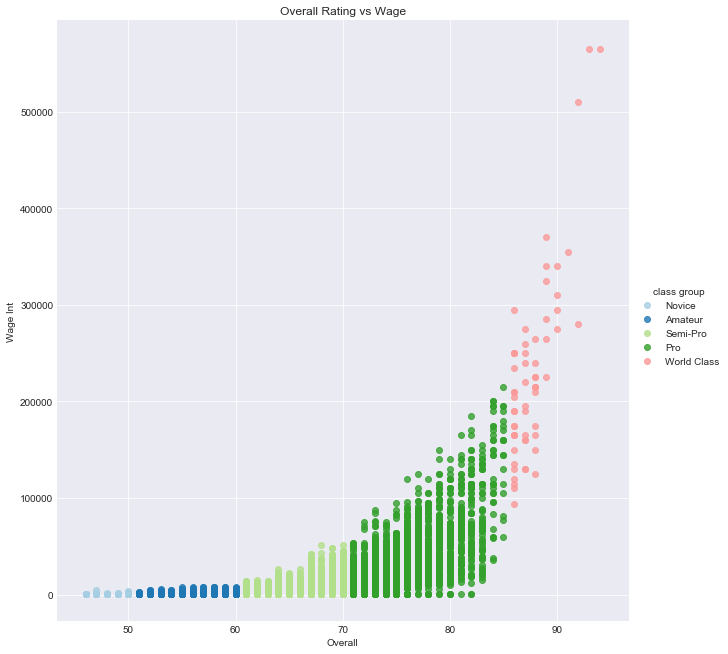

In [38]:
overallVvalue = sns.lmplot(data = final_df, x="Overall", y="Wage Int", fit_reg=f, hue='class group', size=9)
plt.title("Overall Rating vs Wage")

Text(0.5,1,'Overall Rating vs Wage')

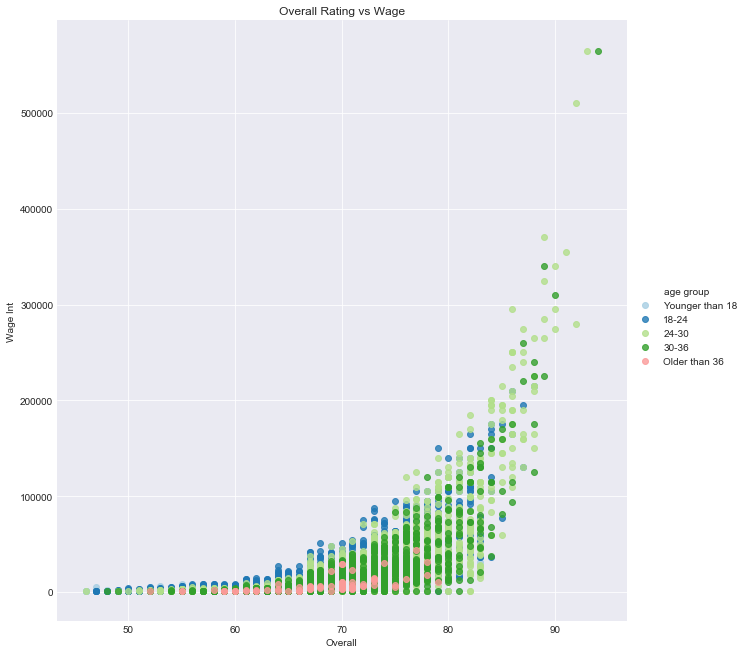

In [39]:
overallVvalue = sns.lmplot(data = final_df, x="Overall", y="Wage Int", fit_reg=f, hue='age group', size=9)
plt.title("Overall Rating vs Wage")

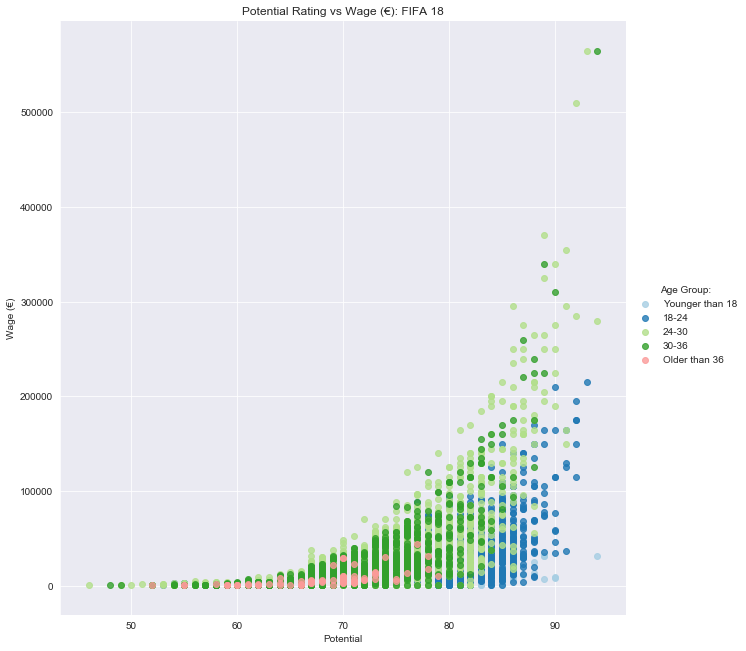

In [472]:
potentialVvalue = sns.lmplot(data = final_df, x="Potential", y="Wage (€)", fit_reg=f, hue='Age Group:', size=9)
plt.title("Potential Rating vs Wage (€): FIFA 18")
plt.savefig("potential_value_age.png")

Text(0.5,1,'Potential Rating vs Wage')

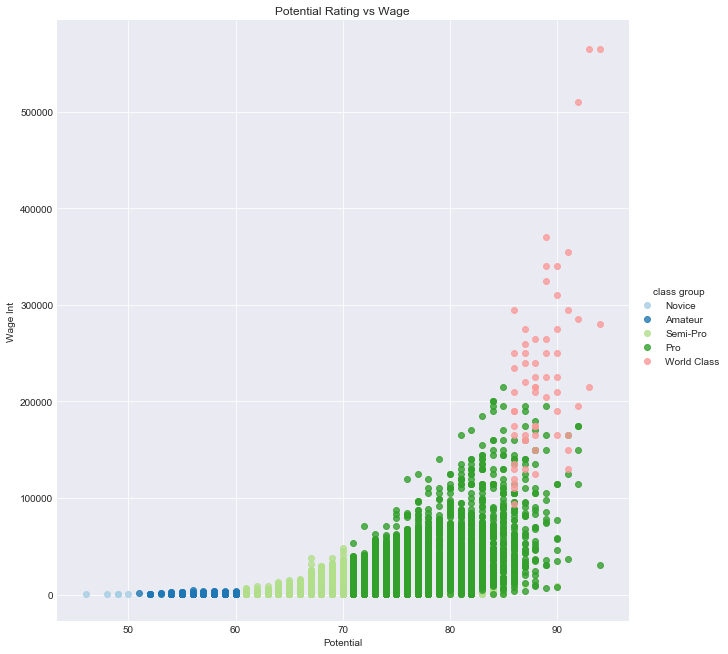

In [41]:
potentialVvalue = sns.lmplot(data = final_df, x="Potential", y="Wage Int", fit_reg=f, hue='class group', size=9)
plt.title("Potential Rating vs Wage")

Text(0.5,1,'Aggression Rating vs Value')

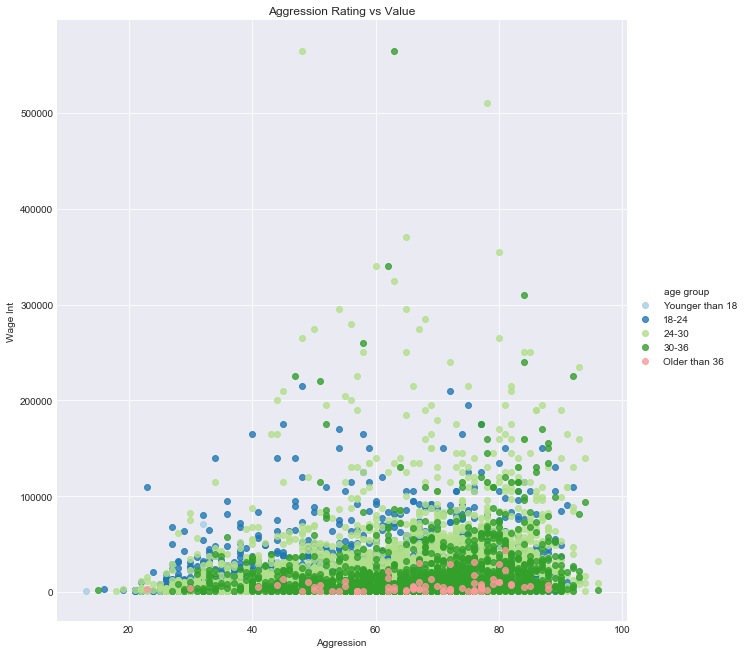

In [42]:
AggressionVvalue = sns.lmplot(data = final_df, x="Aggression", y="Wage Int", fit_reg=f, hue='age group', size=9) 
plt.title("Aggression Rating vs Value")

Text(0.5,1,'Aggression Rating vs Value')

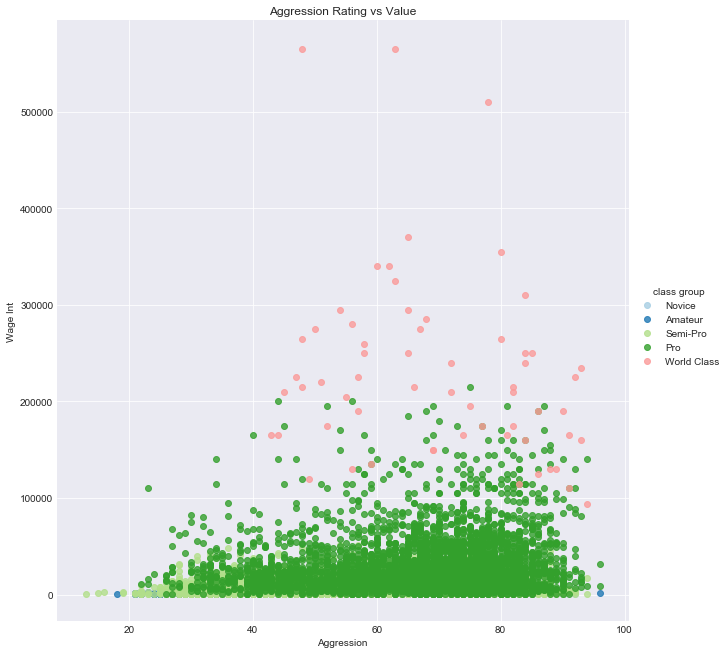

In [43]:
AggressionVvalue = sns.lmplot(data = final_df, x="Aggression", y="Wage Int", fit_reg=f, hue='class group', size=9) 
plt.title("Aggression Rating vs Value")

Text(0.5,1,'Overall Rating vs Wage')

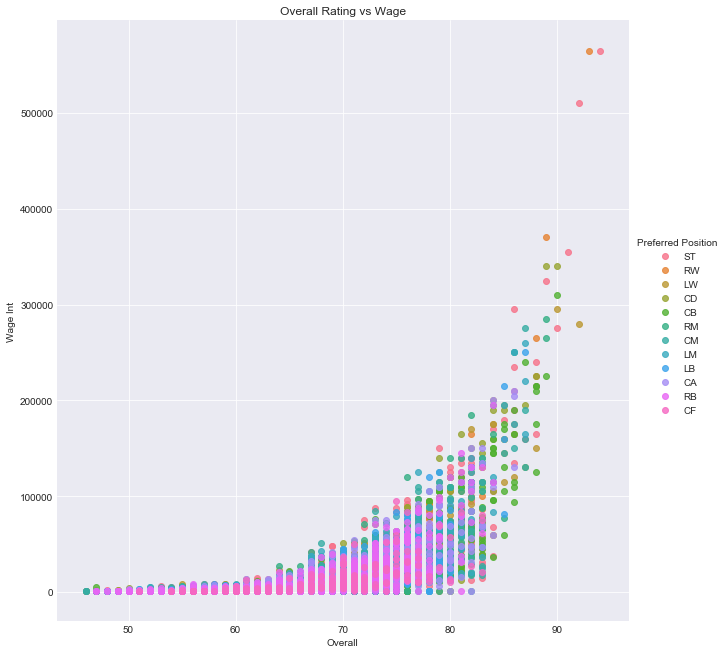

In [44]:
positionVvalue = sns.lmplot(data = final_df, x="Overall", y="Wage Int", fit_reg=f, hue='Preferred Position', size=9)
plt.title("Overall Rating vs Wage")

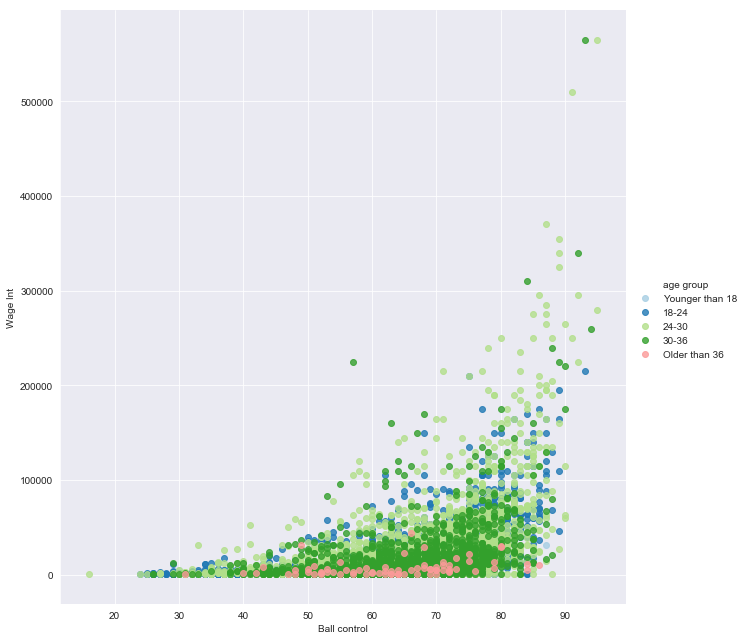

In [268]:
sns.lmplot(data = final_df, x="Ball control", y="Wage Int", fit_reg=f, hue='age group', size=9)


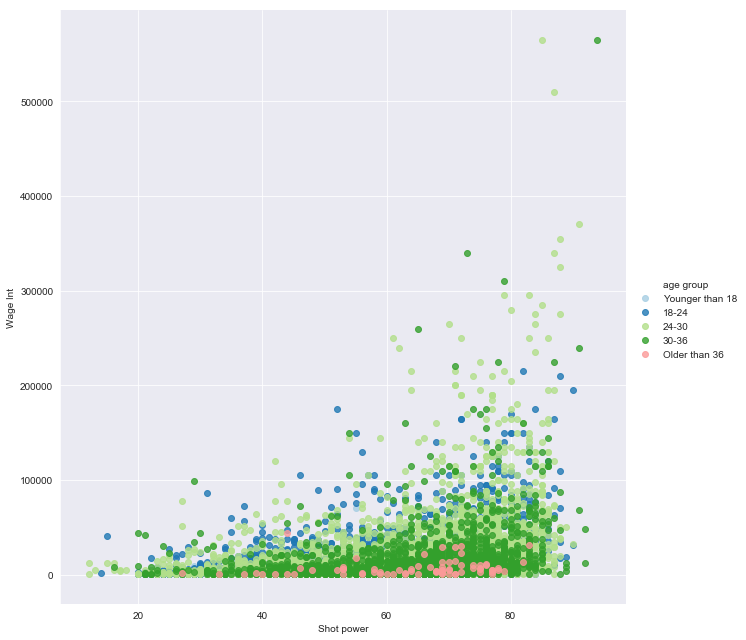

In [269]:
sns.lmplot(data = final_df, x="Shot power", y="Wage Int", fit_reg=f, hue='age group', size=9)

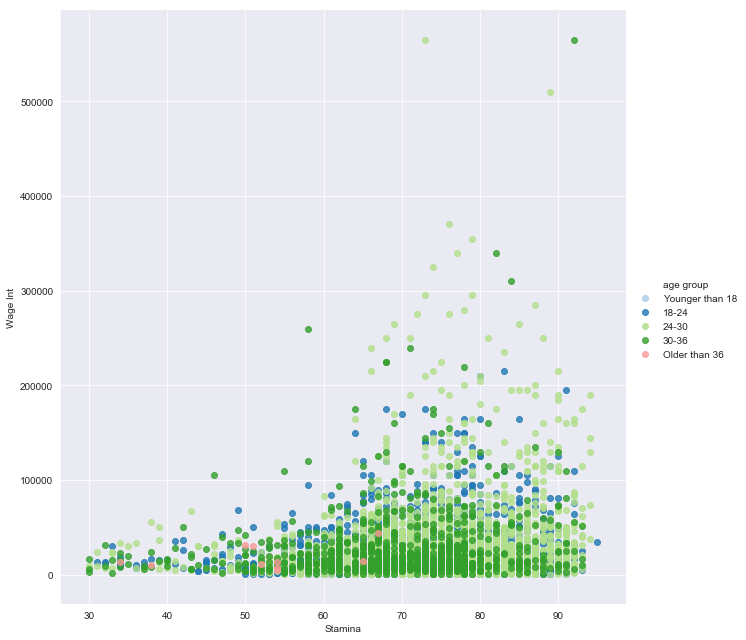

In [279]:
sns.lmplot(data = million_final_df, x="Stamina", y="Wage Int", fit_reg=f, hue='age group', size=9)

In [ ]:
sns.lmplot(data = final_df, x="Ball control", y="Wage Int", fit_reg=f, hue='age group', size=9)

In [37]:
age_overall = final_df[["Age","Overall","Wage Int"]]
grouped_age = age_overall.groupby("Age")
mean_grouped_age = grouped_age.mean()
reset_mean_grouped_age = mean_grouped_age.reset_index()
reset_mean_grouped_age.shape
mean_grouped_age

Overall      Wage Int
Age                         
16   57.916667   1916.666626
17   56.351598   2328.767090
18   57.492462   2840.871094
19   59.726514   3813.152344
20   61.923077   6781.752930
21   63.752431   8136.162598
22   65.126784   9520.571289
23   66.423015  11531.604492
24   67.440067  12041.073242
25   68.220610  13477.503906
26   68.856607  16233.364258
27   69.214844  17087.890625
28   69.208972  17859.957031
29   69.797776  16286.147461
30   69.849711  19345.375000
31   69.873905  17947.460938
32   69.563679  16587.263672
33   69.874517  13554.053711
34   68.824390  13248.780273
35   69.190141   9725.352539
36   69.855556  10033.333008
37   68.404762   8595.238281
38   67.173913   6347.826172
39   66.444444   3777.777832

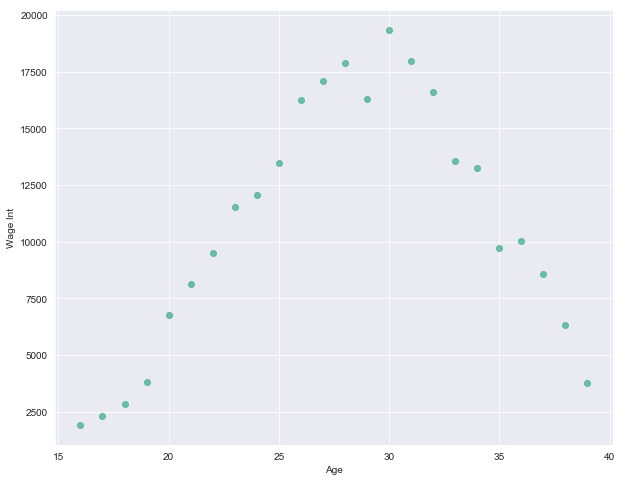

In [261]:
sns.regplot(x=reset_mean_grouped_age["Age"], y=reset_mean_grouped_age["Wage Int"], fit_reg=f, color="#4CB391")

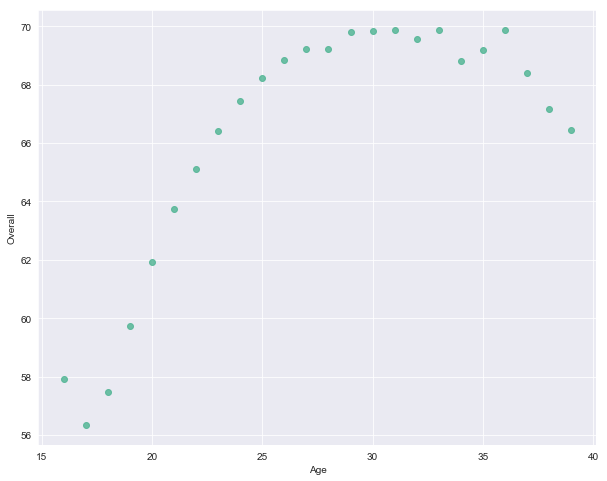

In [259]:
sns.regplot(x=reset_mean_grouped_age["Age"], y=reset_mean_grouped_age["Overall"], fit_reg=f, color="#4CB391")

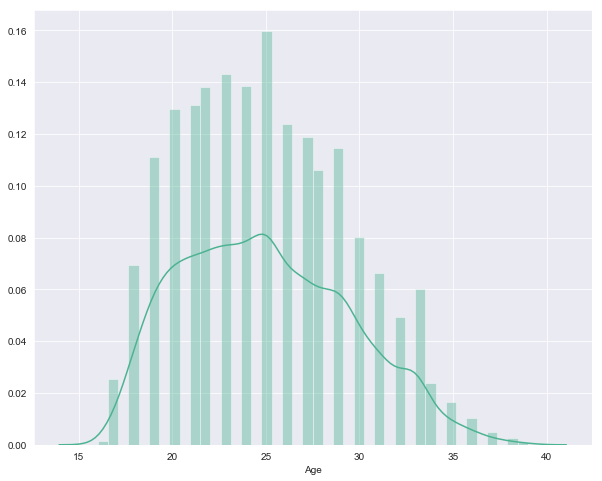

In [258]:
sns.distplot(final_df["Age"], color="#4CB391")


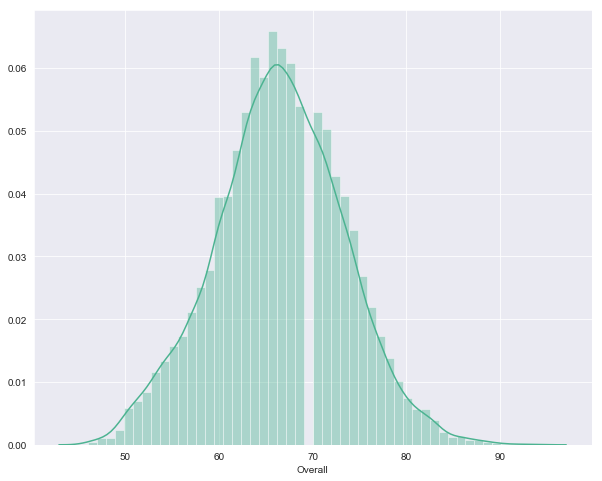

In [256]:
overallDist = sns.distplot(final_df["Overall"],color="#4CB391")

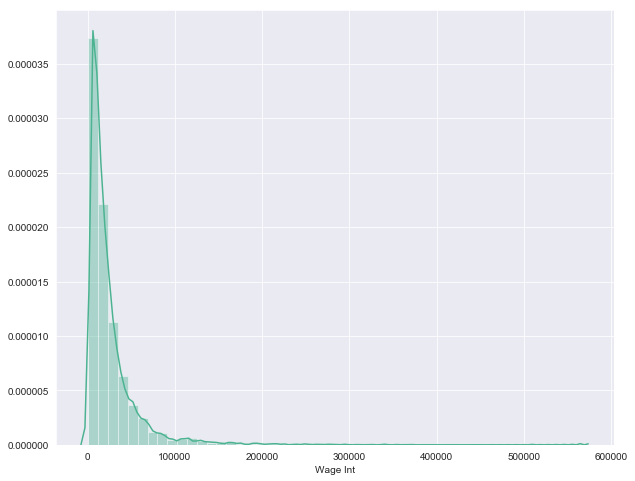

In [251]:
sns.distplot(million_final_df["Wage Int"], color="#4CB391")

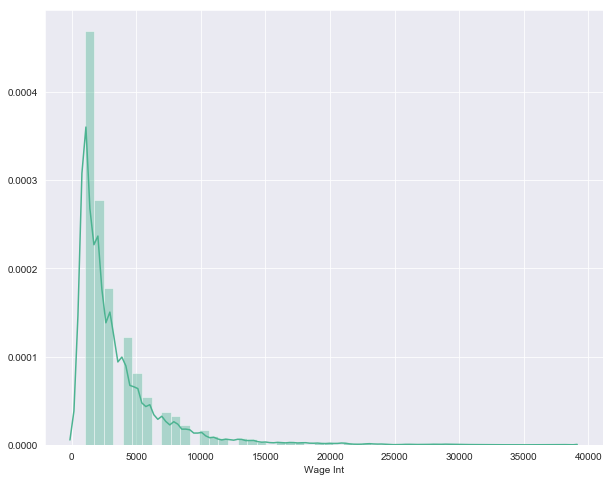

In [253]:
sns.distplot(thousand_final_df["Wage Int"], color="#4CB391")

Text(0.5,1,'Overall Rating vs Wage')

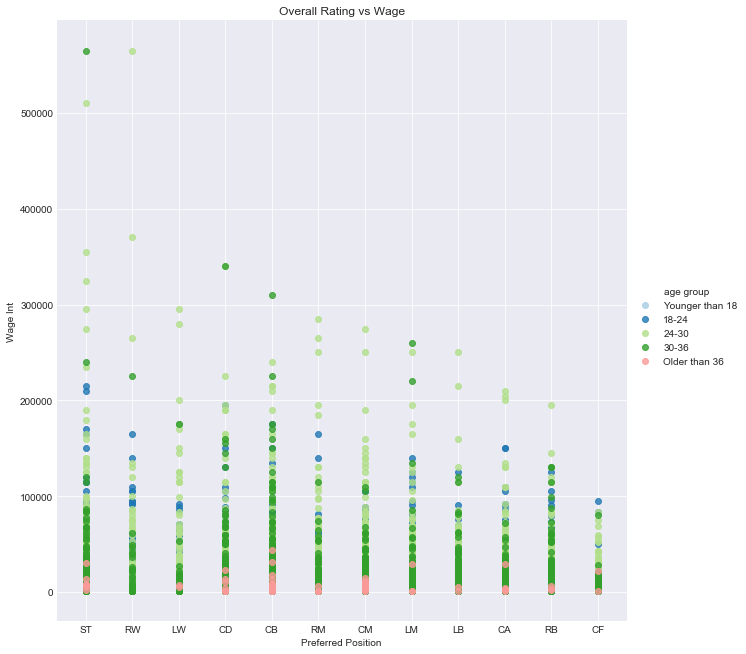

In [50]:
overallVvalue = sns.lmplot(data = final_df, x="Preferred Position", y="Wage Int", fit_reg=f, hue='age group', size=9)
plt.title("Overall Rating vs Wage")

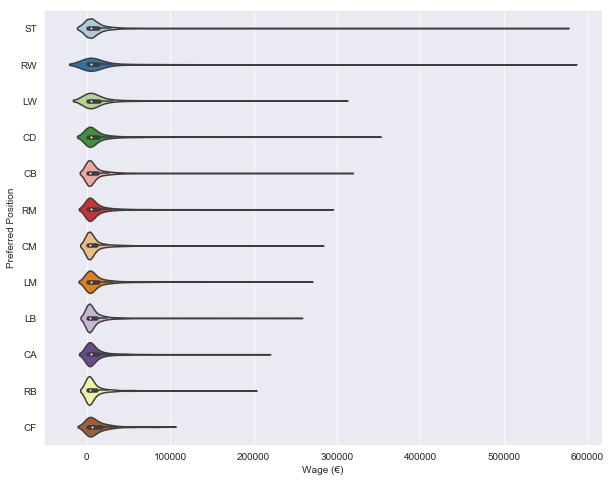

In [479]:
sns.violinplot(x="Wage (€)",y="Preferred Position", data=final_df)

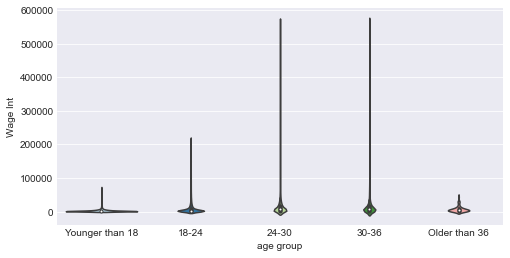

In [52]:
sns.violinplot(x="age group",y="Wage Int", data=final_df)

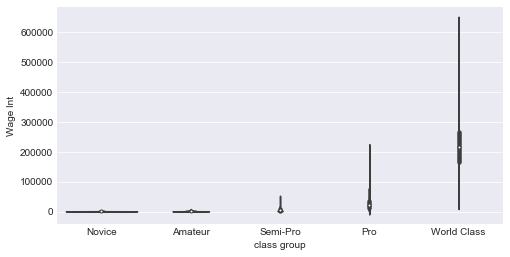

In [53]:
sns.violinplot(x="class group",y="Wage Int", data=final_df)

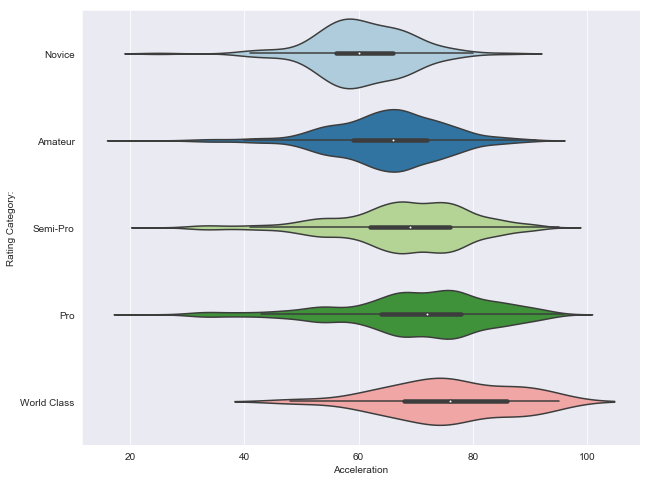

In [480]:
sns.violinplot(x="Acceleration",y="Rating Category:", data= final_df)

NameError: name 'savefig' is not defined

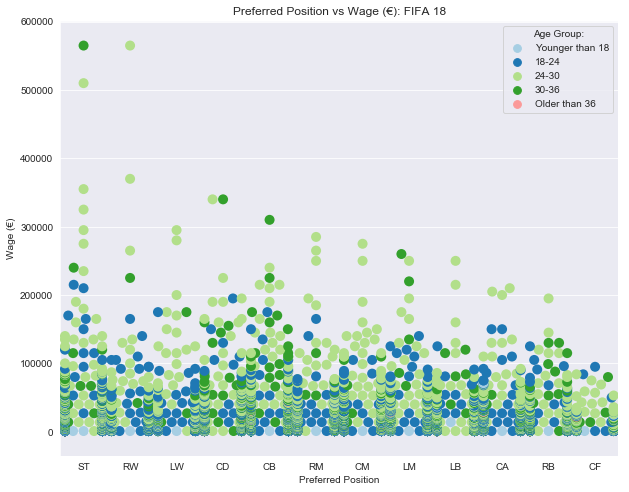

In [471]:
positionPlot = sns.swarmplot(x="Preferred Position", y="Wage (€)", data=final_df, hue="Age Group:", size=10)
plt.title("Preferred Position vs Wage (€): FIFA 18")
savefig('position_wage_age_swarm.png')

In [ ]:
positionPie = sns.

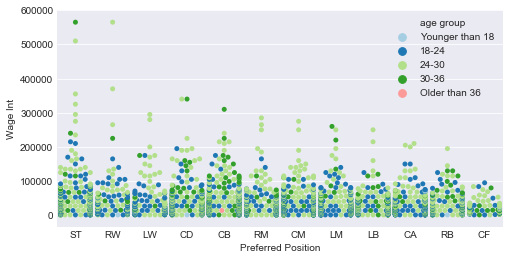

In [142]:
positionPlot = sns.swarmplot(x="Preferred Position", y='Wage Int', hue="age group", data=million_final_df)

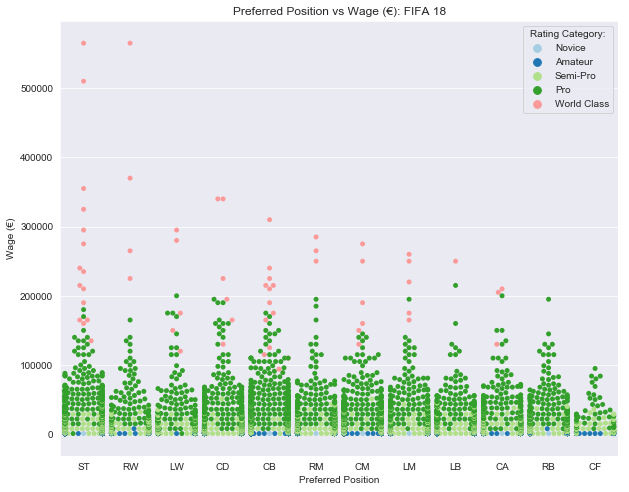

In [478]:
positionPlot = sns.swarmplot(x="Preferred Position", y='Wage (€)', hue="Rating Category:", data=final_df)
plt.title("Preferred Position vs Wage (€): FIFA 18")
plt.savefig("all_preferred_position_wage_rating.png")

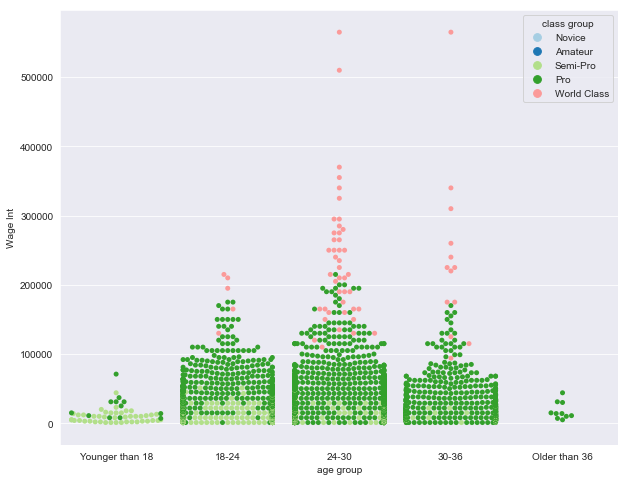

In [266]:
positionPlot = sns.swarmplot(x="age group", y='Wage Int', hue="class group", data=million_final_df)

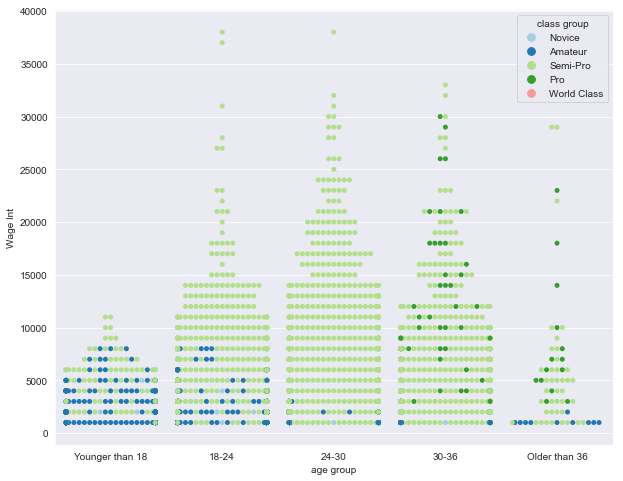

In [262]:
positionPlot = sns.swarmplot(x="age group", y='Wage Int', hue="class group", data=thousand_final_df)

In [38]:
# These graphs tell a little bit of the story, however, splitting the datafram back up based up value may give us better vizulizations
thousand_final_df = final_df[final_df["Thou/Mill"] != 'Mill']
million_final_df = final_df[final_df["Thou/Mill"] == 'Mill']

In [39]:
thousand_final_df.head()
million_final_df.head()

Unnamed: 0               Name  Age  Overall  Potential  \
0           0  Cristiano Ronaldo   32       94         94   
1           1           L. Messi   30       93         93   
3           3          L. Suárez   30       92         92   
2           2             Neymar   25       92         94   
5           5     R. Lewandowski   28       91         91   

                  Club   Value   Wage  Acceleration  Aggression     ...       \
0       Real Madrid CF  €95.5M  €565K          89.0        63.0     ...        
1         FC Barcelona   €105M  €565K          92.0        48.0     ...        
3         FC Barcelona    €97M  €510K          88.0        78.0     ...        
2  Paris Saint-Germain   €123M  €280K          94.0        56.0     ...        
5     FC Bayern Munich    €92M  €355K          79.0        80.0     ...        

   Strength  Sprint speed  Stamina  Preferred Positions  Thou/Mill  \
0      80.0          91.0     92.0               ST LW        Mill   
1      59.0          87.0     73.0                  RW        Mill   
3      80.0          77.0     89.0                  ST        Mill   
2      53.0          90.0     78.0                  LW        Mill   
5      84.0          83.0     79.0                  ST        Mill   

     Value Int  Wage Int Preferred Position age group  class group  
0   95000000.0  565000.0                 ST     30-36  World Class  
1  105000000.0  565000.0                 RW     24-30  World Class  
3   97000000.0  510000.0                 ST     24-30  World Class  
2  123000000.0  280000.0                 LW     24-30  World Class  
5   92000000.0  355000.0                 ST     24-30  World Class  

[5 rows x 24 columns]

Text(0.5,1,'Overall Rating vs Wage')

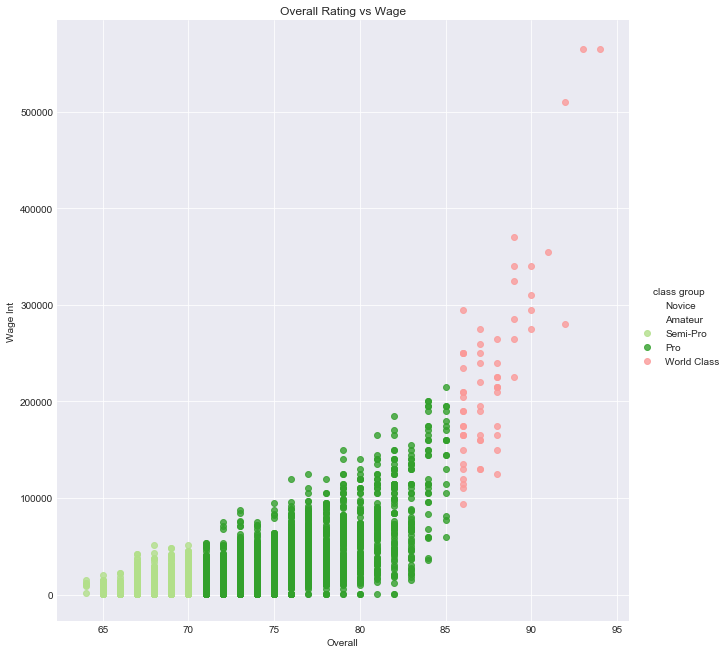

In [57]:
millionoverallVvalue = sns.lmplot(data = million_final_df, x="Overall", y="Wage Int", fit_reg=f, hue='class group', size=9)
plt.title("Overall Rating vs Wage")

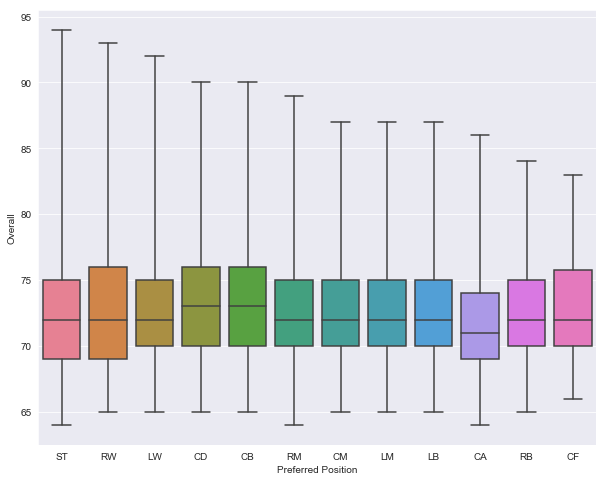

In [462]:
sns.boxplot(x=million_final_df["Preferred Position"], y=million_final_df["Overall"], data=million_final_df,
            whis="range", palette="husl")

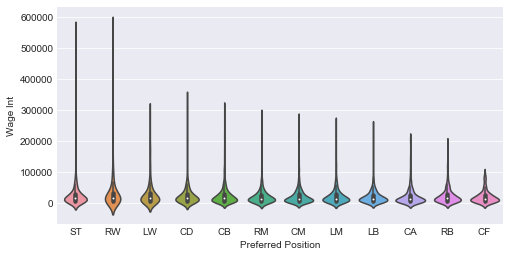

In [58]:
sns.violinplot(x="Preferred Position",y="Wage Int", data= million_final_df)

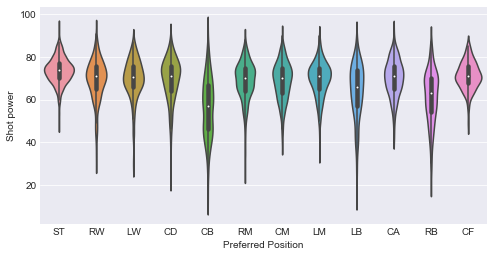

In [59]:
sns.violinplot(x="Preferred Position",y="Shot power", data= million_final_df)

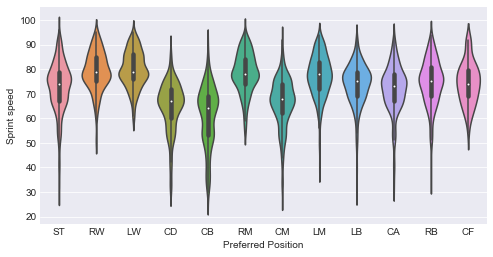

In [60]:
sns.violinplot(x="Preferred Position",y="Sprint speed", data= million_final_df)

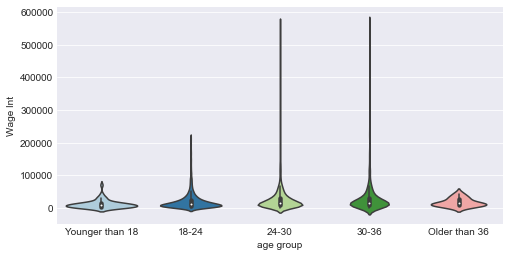

In [61]:
sns.violinplot(x="age group",y="Wage Int", data=million_final_df)

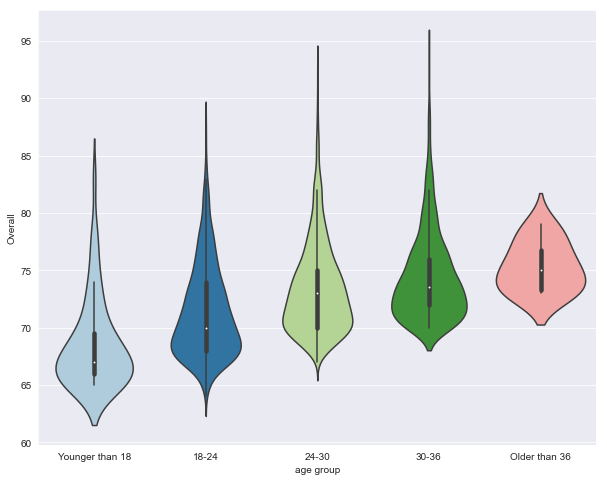

In [265]:
sns.violinplot(x="age group",y="Overall", data=million_final_df)

Text(0.5,1,'Aggression Rating vs Value')

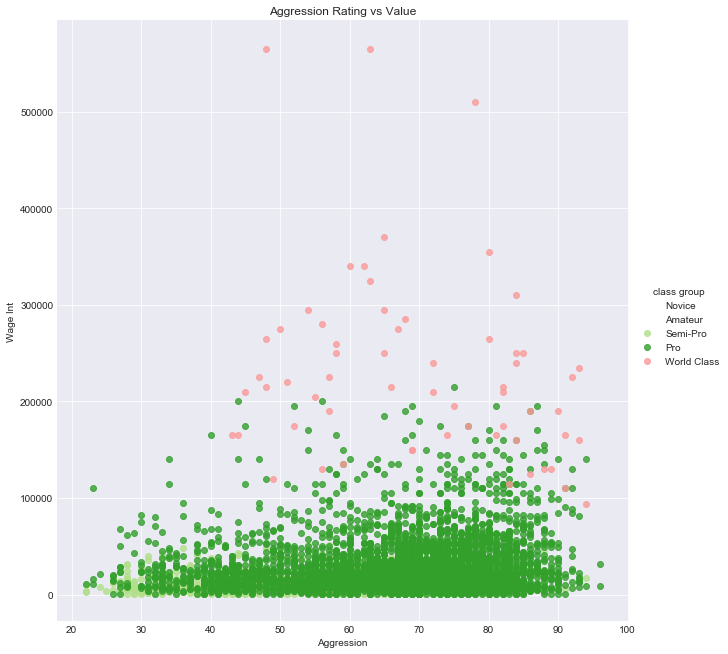

In [62]:
millionAggressionVvalue = sns.lmplot(data = million_final_df, x="Aggression", y="Wage Int", fit_reg=f, hue='class group', size=9) 
plt.title("Aggression Rating vs Value")

Text(0.5,1,'Overall Rating vs Wage')

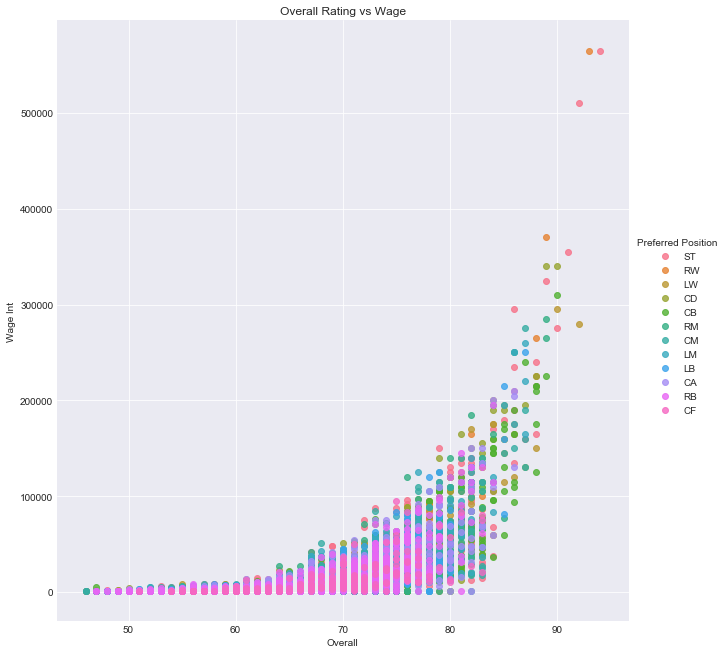

In [63]:
positionVvalue = sns.lmplot(data = final_df, x="Overall", y="Wage Int", fit_reg=f, hue='Preferred Position', size=9)
plt.title("Overall Rating vs Wage")

Text(0.5,1,'Overall Rating vs Wage')

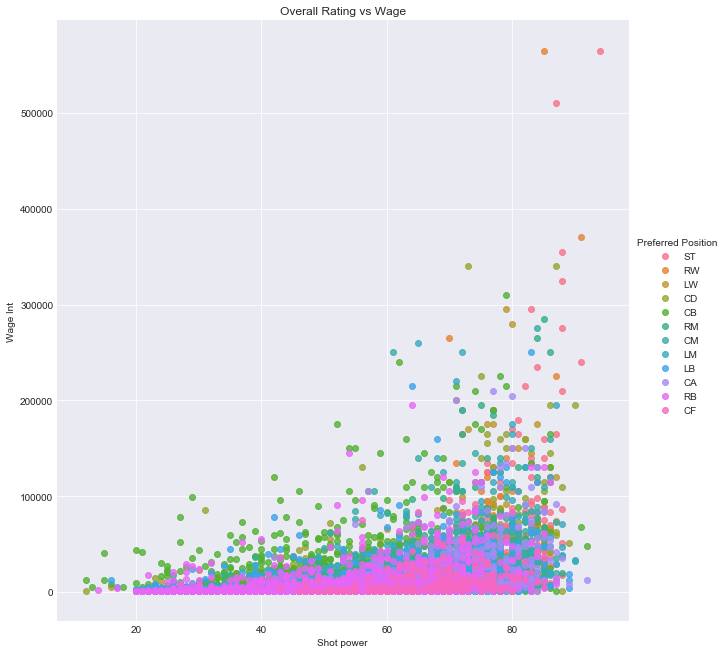

In [64]:
positionVvalue = sns.lmplot(data = final_df, x="Shot power", y="Wage Int", fit_reg=f, hue='Preferred Position', size=9)
plt.title("Overall Rating vs Wage")

Text(0.5,1,'Overall Rating vs Wage')

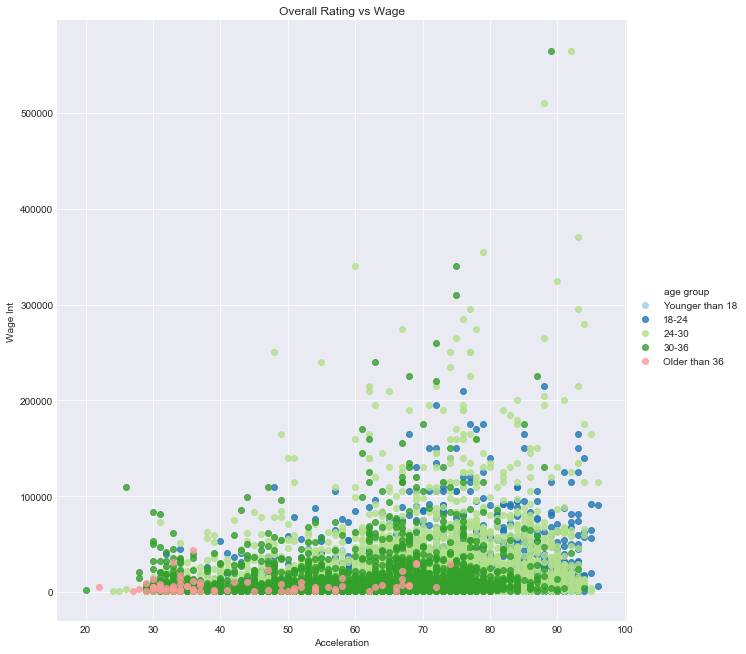

In [65]:
positionVvalue = sns.lmplot(data = final_df, x="Acceleration", y="Wage Int", fit_reg=f, hue='age group', size=9)
plt.title("Overall Rating vs Wage")

Text(0.5,1,'Overall Rating vs Wage')

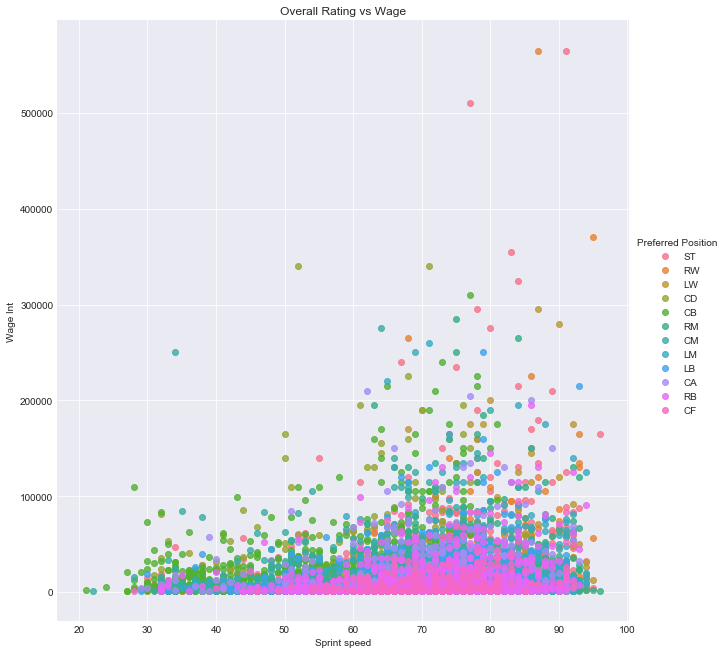

In [66]:
positionVvalue = sns.lmplot(data = final_df, x="Sprint speed", y="Wage Int", fit_reg=f, hue='Preferred Position', size=9)
plt.title("Overall Rating vs Wage")

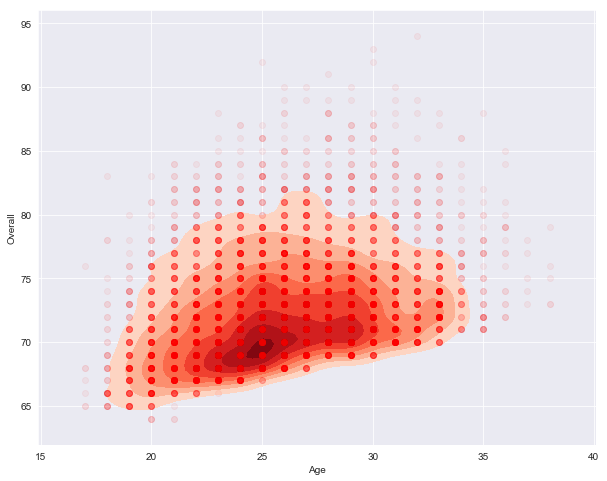

In [214]:
test = sns.kdeplot(million_final_df["Age"], million_final_df["Overall"],
                 cmap="Reds", shade=t, shade_lowest=f)
plt.scatter(million_final_df["Age"],million_final_df["Overall"], color='r', alpha=0.05)

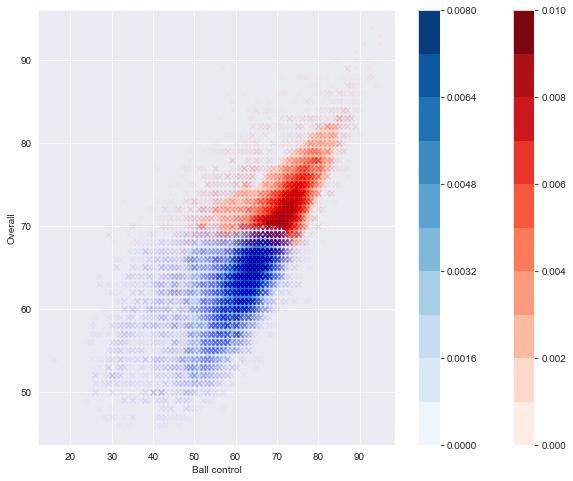

In [222]:
sns.kdeplot(million_final_df["Ball control"], million_final_df["Overall"],
                 cmap="Reds", shade=t, shade_lowest=f, cbar=t)
sns.kdeplot(thousand_final_df["Ball control"], thousand_final_df["Overall"],
                 cmap="Blues", shade=t, shade_lowest=f, cbar=t)
plt.scatter(million_final_df["Ball control"],million_final_df["Overall"], marker="x", color='r', alpha=0.025)
plt.scatter(thousand_final_df["Ball control"],thousand_final_df["Overall"], marker="x", color='b', alpha=0.025)

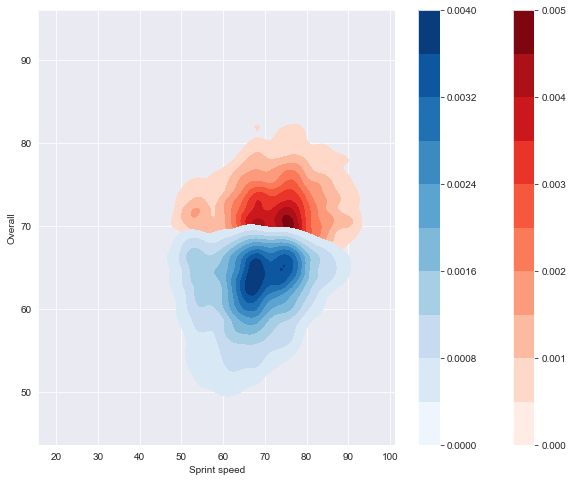

In [207]:
sns.kdeplot(million_final_df["Sprint speed"], million_final_df["Overall"],
                 cmap="Reds", shade=t, shade_lowest=f, cbar=t)
sns.kdeplot(thousand_final_df["Sprint speed"], thousand_final_df["Overall"],
                 cmap="Blues", shade=t, shade_lowest=f, cbar=t)

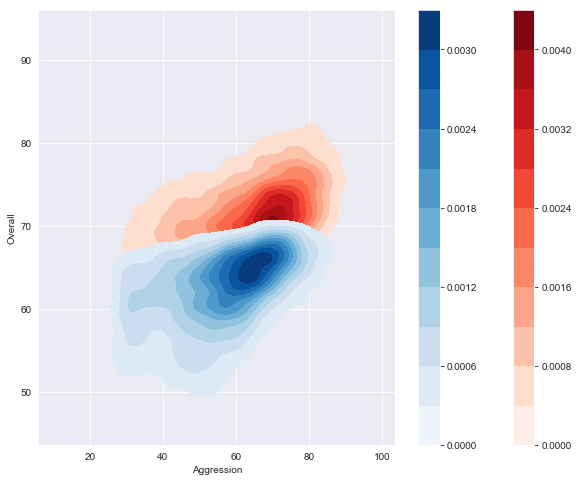

In [206]:
sns.kdeplot(million_final_df["Aggression"], million_final_df["Overall"],
                 cmap="Reds", shade=t, shade_lowest=f, cbar=t)
sns.kdeplot(thousand_final_df["Aggression"], thousand_final_df["Overall"],
                 cmap="Blues", shade=t, shade_lowest=f, cbar=t)

AttributeError: 'str' object has no attribute 'pop'

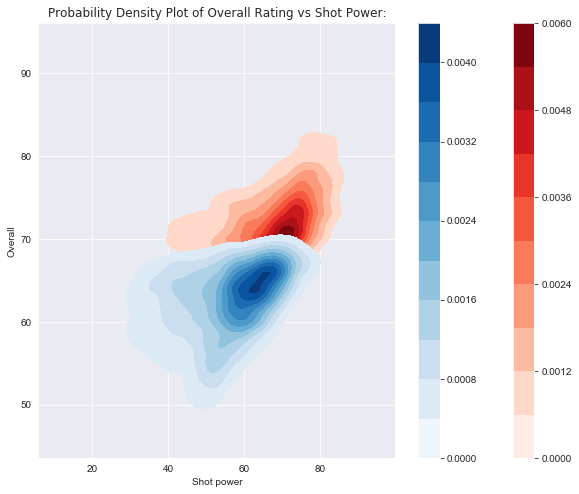

In [288]:
sns.kdeplot(million_final_df["Shot power"], million_final_df["Overall"],
                 cmap="Reds", shade=t, shade_lowest=f, cbar=t)
sns.kdeplot(thousand_final_df["Shot power"], thousand_final_df["Overall"],
                 cmap="Blues", shade=t, shade_lowest=f, cbar=t)
plt.title("Probability Density Plot of Overall Rating vs Shot Power:",fontname="Times New Roman Bold")
plt.text(45,37,'Note : Blue corresponds to players valued under €1,000,000. Red corresponds to players valued over €1,000,000.', 
         r'\underline{Parameters}: ', fontname="Times New Roman Bold")

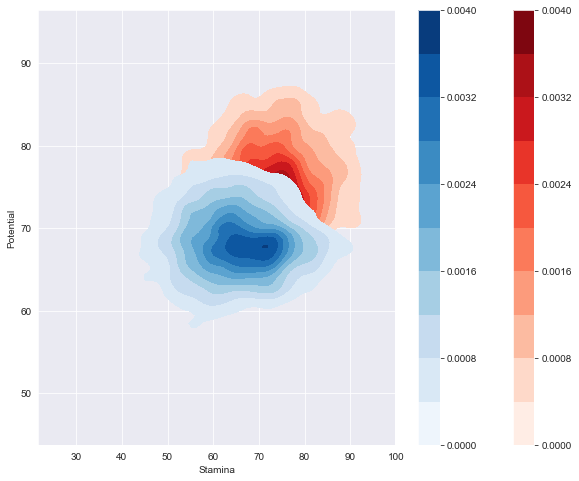

In [204]:
sns.kdeplot(million_final_df["Stamina"], million_final_df["Potential"],
                 cmap="Reds", shade=t, shade_lowest=f, cbar=t)
sns.kdeplot(thousand_final_df["Stamina"], thousand_final_df["Potential"],
                 cmap="Blues", shade=t, shade_lowest=f, cbar=t)

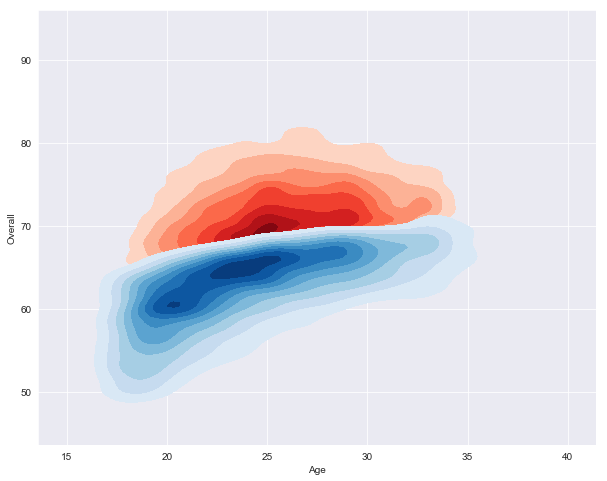

In [203]:
sns.kdeplot(million_final_df["Age"], million_final_df["Overall"],
                 cmap="Reds", shade=t, shade_lowest=f)
sns.kdeplot(thousand_final_df["Age"], thousand_final_df["Overall"],
                 cmap="Blues", shade=t, shade_lowest=f)


In [1]:
sns.kdeplot(million_final_df["Age"], million_final_df["Wage Int"],
                 cmap="Reds", shade=t, shade_lowest=f)
sns.kdeplot(thousand_final_df["Age"], thousand_final_df["Wage Int"],
                 cmap="Blues", shade=t, shade_lowest=f)

NameError: name 'sns' is not defined

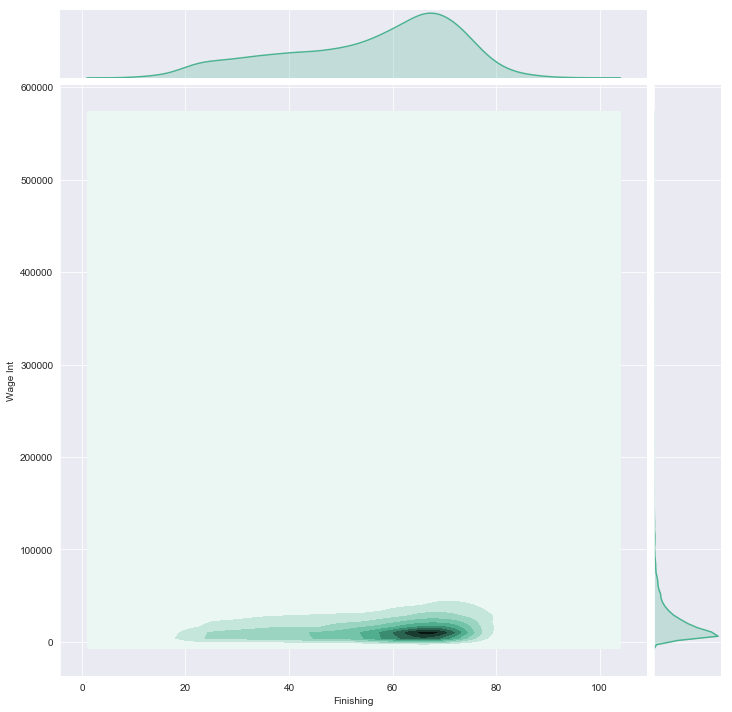

In [281]:
sns.jointplot(x=million_final_df["Finishing"], y=million_final_df[""], kind='kde', color="#4CB391", height=10, ratio=8, space=0.1)

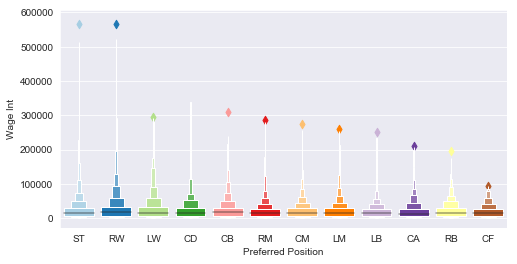

In [168]:
sns.boxenplot(x=million_final_df["Preferred Position"], y=million_final_df["Wage Int"], scale="exponential", 
              data=million_final_df, saturation=2.5)

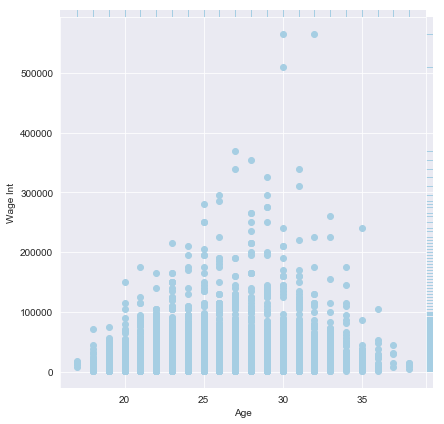

In [53]:
grid = sns.JointGrid(x=million_final_df["Age"], y=million_final_df["Wage Int"], space=0, height=6, ratio=50)
grid.plot_joint(plt.scatter)
grid.plot_marginals(sns.rugplot, height=1)

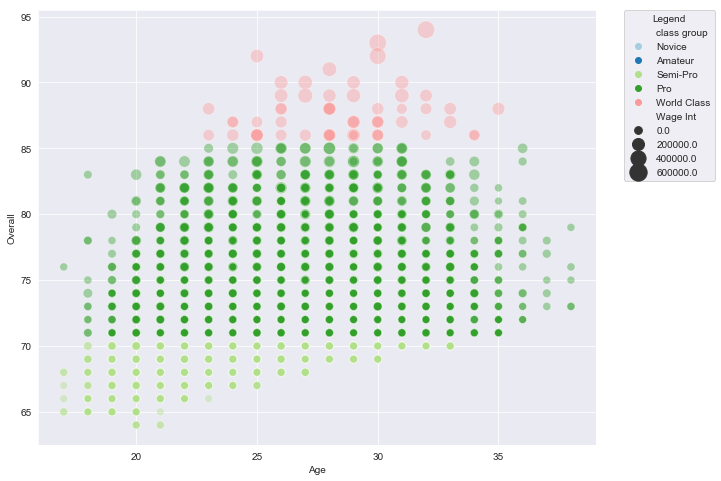

In [220]:

sns.scatterplot(x=million_final_df["Age"], y=million_final_df["Overall"],
                     hue=million_final_df["class group"], size=million_final_df["Wage Int"],
                     sizes=(60, 300), alpha=.40,
                     data=million_final_df) 
plt.legend(title="Legend",bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [230]:
grouped_by_age = million_final_df.groupby("age group")
ageGroupsAvg = grouped_by_age.mean()
ageGroupsVar = grouped_by_age.var()
ageGroupsSD = grouped_by_age.std()


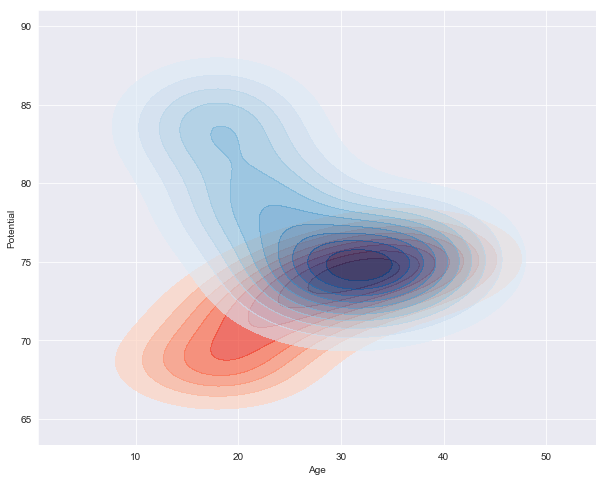

In [241]:
sns.kdeplot(ageGroupsAvg["Age"], ageGroupsAvg["Overall"],
                 cmap="Reds", shade=t, shade_lowest=f, alpha=.7)
sns.kdeplot(ageGroupsAvg["Age"], ageGroupsAvg["Potential"],
                 cmap="Blues", shade=t, shade_lowest=f, alpha=.6)

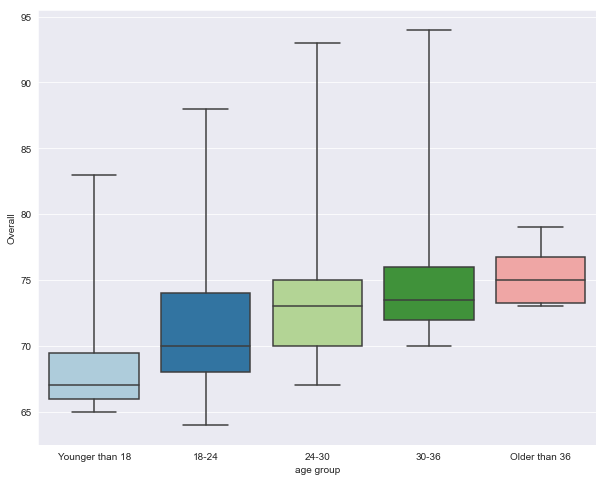

In [264]:
sns.boxplot(x=million_final_df["age group"], y=million_final_df["Overall"], data=million_final_df,
            whis="range")

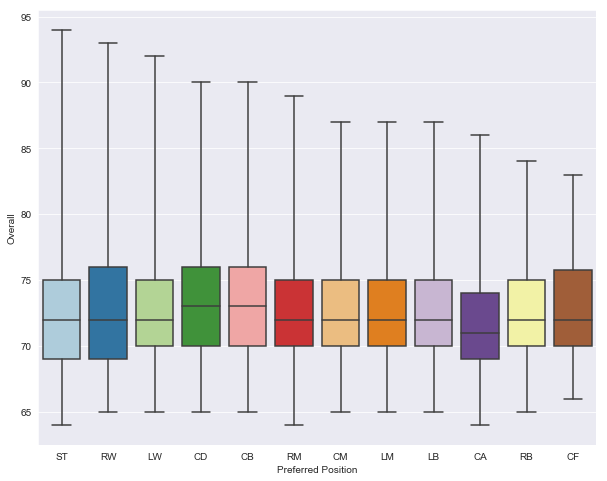

In [458]:
sns.boxplot(x=million_final_df["Preferred Position"], y=million_final_df["Overall"], data=million_final_df,
            whis="range")

In [401]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

Text(0.5,0,'Wage')

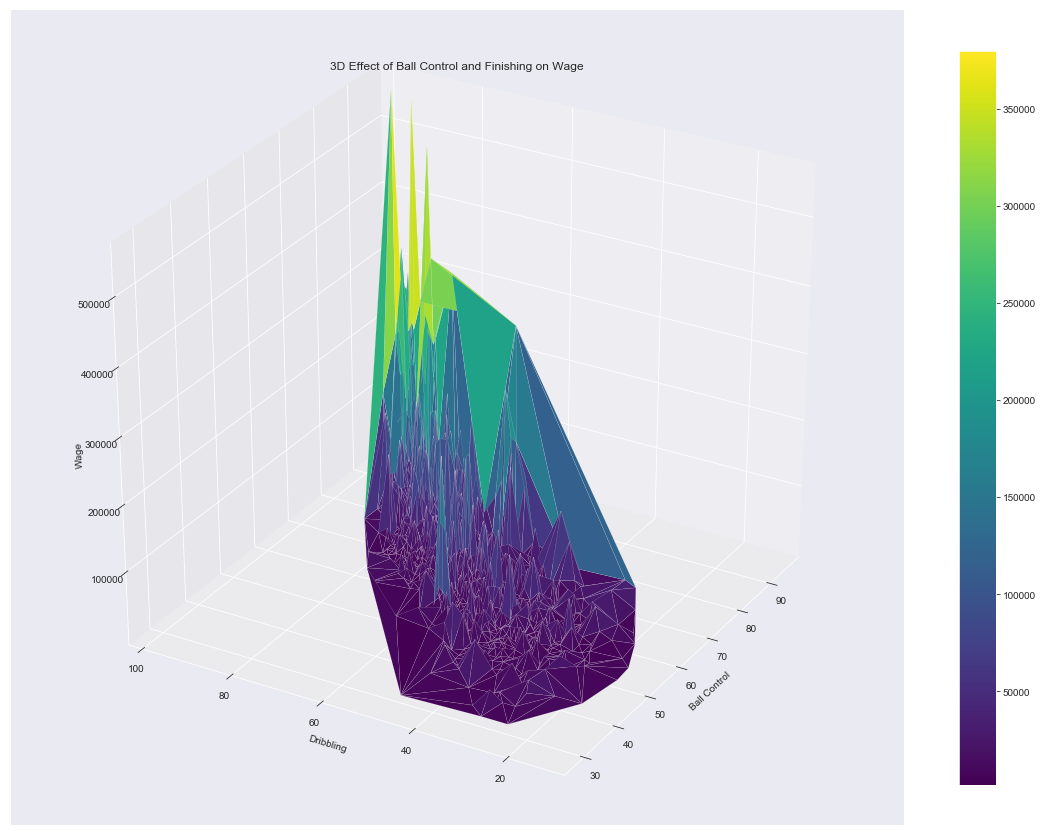

In [430]:
fig = plt.figure(figsize=(20,15))
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(million_final_df['Ball control'], million_final_df['Dribbling'], million_final_df['Wage Int'], cmap=plt.cm.viridis, linewidth=.09)
fig.colorbar( surf, shrink=.9, aspect=20)
ax.view_init(30,210)
plt.title("3D Effect of Ball Control and Finishing on Wage")
plt.xlabel("Ball Control")
plt.ylabel("Dribbling")
ax.set_zlabel("Wage", Rotation=93.4)

Text(0.5,0,'Wage')

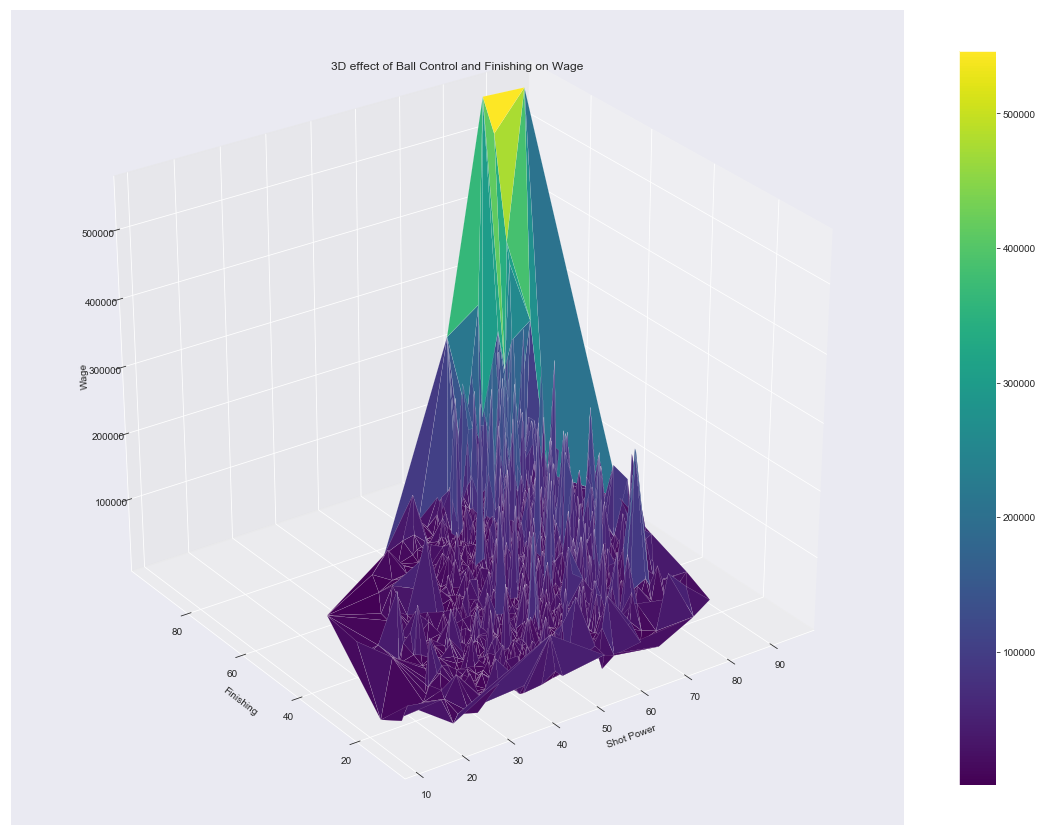

In [437]:
fig = plt.figure(figsize=(20,15))
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(million_final_df['Shot power'], million_final_df['Finishing'], million_final_df['Wage Int'], cmap=plt.cm.viridis, linewidth=.09)
fig.colorbar( surf, shrink=.9, aspect=20)
ax.view_init(30,235)
plt.title("3D effect of Ball Control and Finishing on Wage")
plt.xlabel("Shot Power")
plt.ylabel("Finishing")
ax.set_zlabel("Wage", Rotation=93.4)

Text(0.5,0,'Wage')

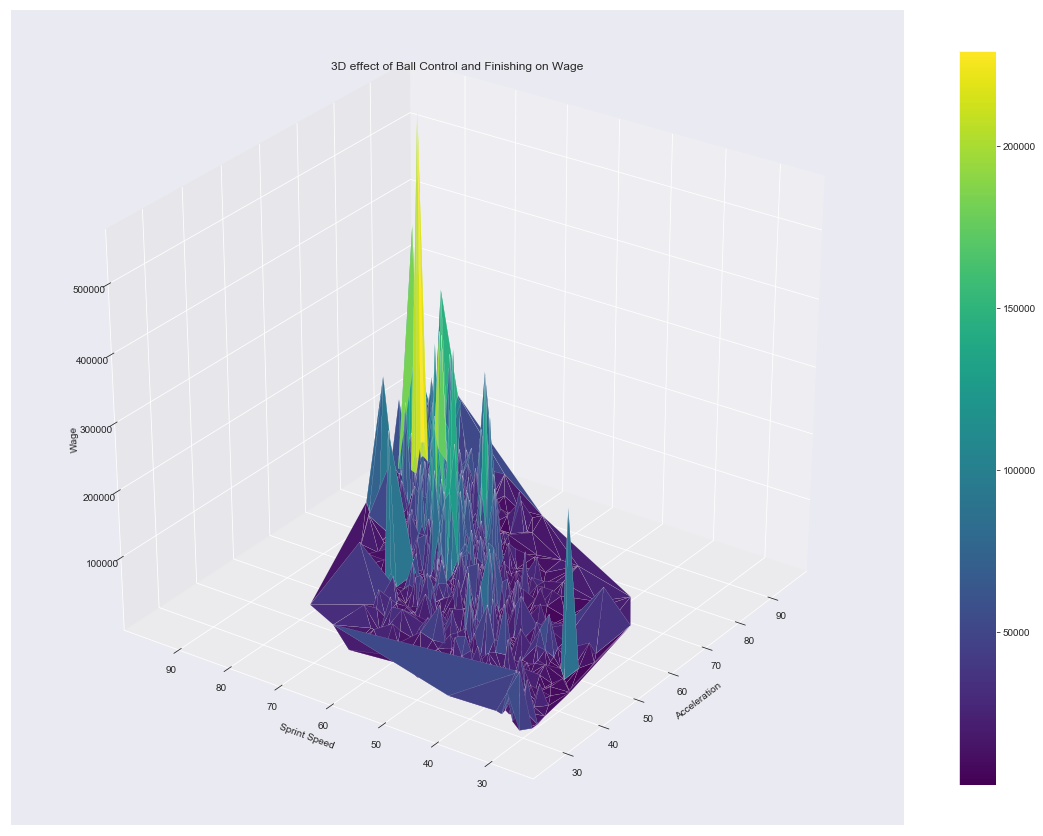

In [441]:
fig = plt.figure(figsize=(20,15))
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(million_final_df['Acceleration'], million_final_df['Sprint speed'], million_final_df['Wage Int'], cmap=plt.cm.viridis, linewidth=.09)
fig.colorbar( surf, shrink=.9, aspect=20)
ax.view_init(30,215)
plt.title("3D effect of Ball Control and Finishing on Wage")
plt.xlabel("Acceleration")
plt.ylabel("Sprint Speed")
ax.set_zlabel("Wage", Rotation=93.4)

Text(0.5,0,'Wage')

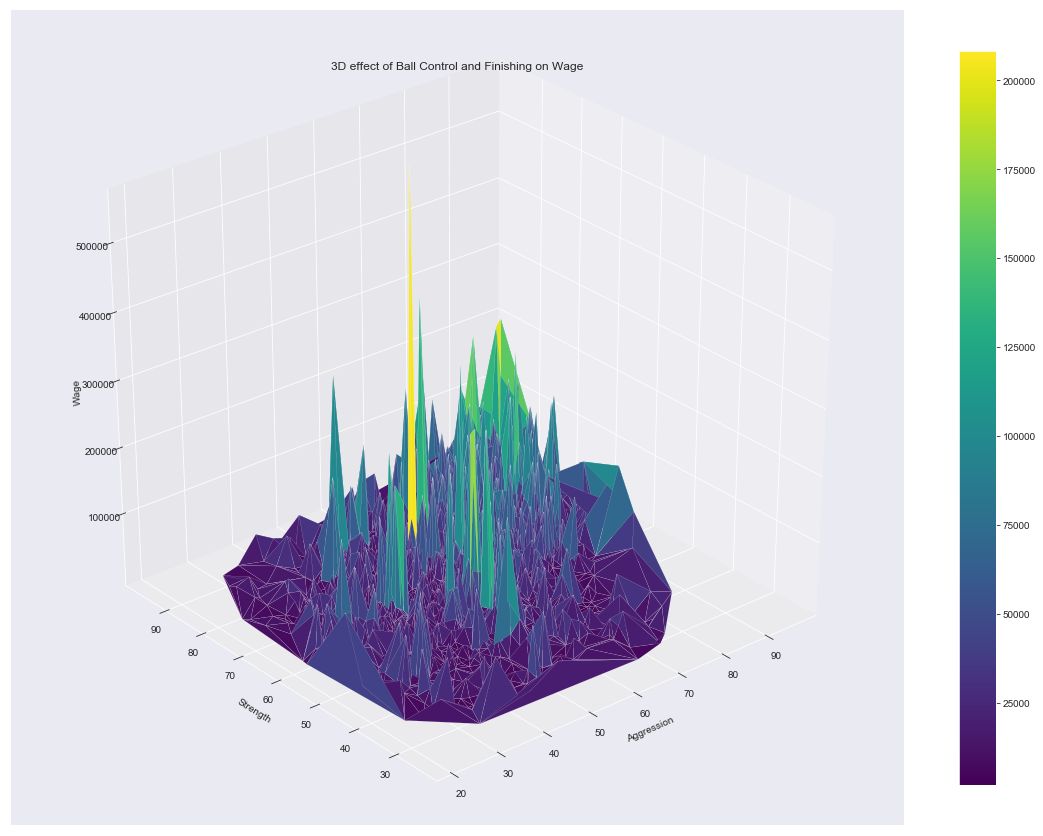

In [443]:
fig = plt.figure(figsize=(20,15))
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(million_final_df['Aggression'], million_final_df['Strength'], million_final_df['Wage Int'], cmap=plt.cm.viridis, linewidth=.09)
fig.colorbar( surf, shrink=.9, aspect=20)
ax.view_init(30,230)
plt.title("3D effect of Ball Control and Finishing on Wage")
plt.xlabel("Aggression")
plt.ylabel("Strength")
ax.set_zlabel("Wage", Rotation=93.4)

Text(0.5,0,'Wage')

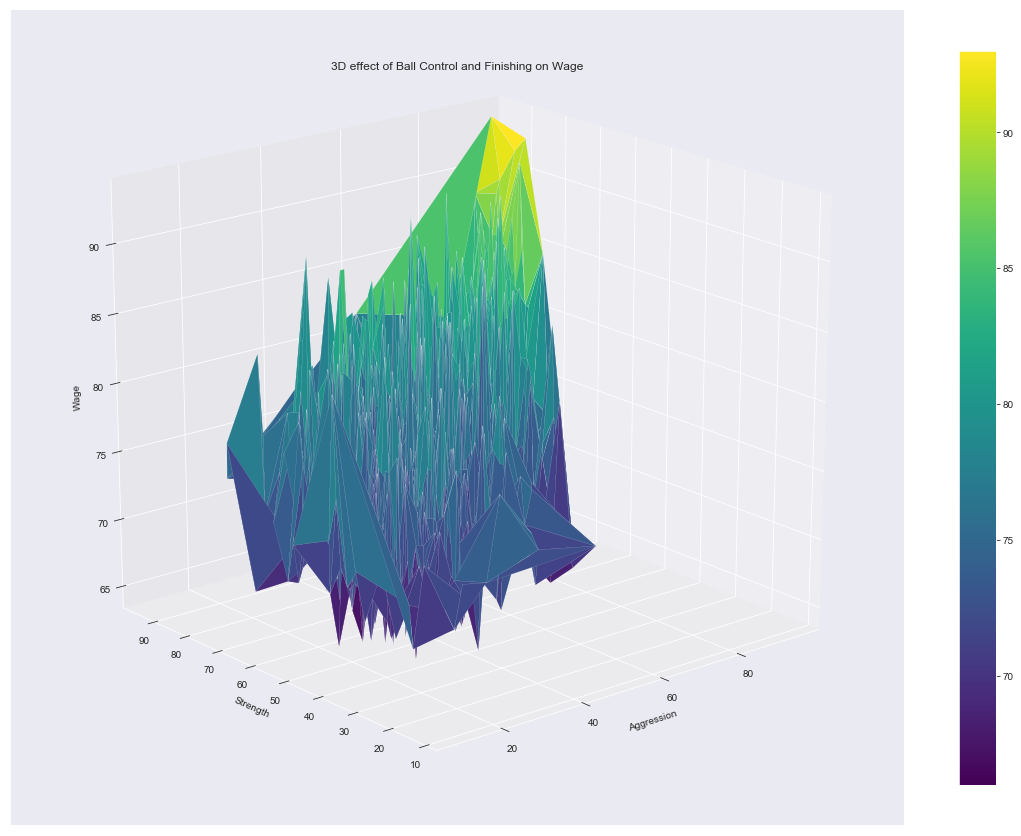

In [457]:
fig = plt.figure(figsize=(20,15))
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(million_final_df['Finishing'], million_final_df['Shot power'], million_final_df['Overall'], cmap=plt.cm.viridis, linewidth=.09)
fig.colorbar( surf, shrink=.9, aspect=20)
ax.view_init(20,230)
plt.title("3D effect of Ball Control and Finishing on Wage")
plt.xlabel("Aggression")
plt.ylabel("Strength")
ax.set_zlabel("Wage", Rotation=93.4)